In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw
import seaborn as sns 
import pandas as pd
import sys
import scipy.stats as ss
sns.set_style('ticks')

In [2]:
sys.path.append('..')

In [3]:
def cases(beta,gamma,eps,I0):
    if(eps > 0):
        R0 = beta/gamma 
        alpha = (1/R0) + eps + I0
        beta2 = np.log((1/R0) + eps)
        gamma = R0
        C = (1/gamma)*(lambertw(-gamma*np.exp(beta2 - alpha*gamma)) + (alpha*gamma))
    else:
        C = 1
    return np.real(C)

In [4]:
def avg_2(x):
    res = []
    for i in range(len(x)-1):
        res.append((x[i]+x[i+1])/2)
    return res

In [5]:
files_1prop = ['measles/measles_-0.05/GTP_fsize_inf_2e-06_-0.05_500000.csv',
        'measles/measles_-0.03/GTP_fsize_inf_2e-06_-0.03_500000.csv',
        'measles/measles_-0.01/GTP_fsize_inf_2e-06_-0.01_500000.csv',
        'measles/measles_0/GTP_fsize_inf_2e-06_0_500000.csv',
        'measles/measles_0.01/GTP_fsize_inf_2e-06_0.01_500000.csv',
        'measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv',
        'measles/measles_0.05/GTP_fsize_inf_2e-06_0.05_500000.csv',
        'measles/measles_0.1/GTP_fsize_inf_2e-06_0.1_500000.csv']

files_2prop = ['measles/measles_-0.05_2prop/GTP_fsize_inf_2.0_-0.05_500000.csv',
        'measles/measles_-0.03_2prop/GTP_fsize_inf_2.0_-0.03_500000.csv',
        'measles/measles_-0.01_2prop/GTP_fsize_inf_2.0_-0.01_500000.csv',
        'measles/measles_0_2prop/GTP_fsize_inf_2.0_0_500000.csv',
        'measles/measles_0.01_2prop/GTP_fsize_inf_2.0_0.01_500000.csv',
        'measles/measles_0.03_2prop/GTP_fsize_inf_2.0_0.03_500000.csv',
        'measles/measles_0.05_2prop/GTP_fsize_inf_2.0_0.05_500000.csv',
        'measles/measles_0.1_2prop/GTP_fsize_inf_2.0_0.1_500000.csv']

files_5prop = ['measles/measles_-0.05_5prop/GTP_fsize_inf_5.0_-0.05_500000.csv',
        'measles/measles_-0.03_5prop/GTP_fsize_inf_5.0_-0.03_500000.csv',
        'measles/measles_-0.01_5prop/GTP_fsize_inf_5.0_-0.01_500000.csv',
        'measles/measles_0_5prop/GTP_fsize_inf_5.0_0_500000.csv',
        'measles/measles_0.01_5prop/GTP_fsize_inf_5.0_0.01_500000.csv',
        'measles/measles_0.03_5prop/GTP_fsize_inf_5.0_0.03_500000.csv',
        'measles/measles_0.05_5prop/GTP_fsize_inf_5.0_0.05_500000.csv',
        'measles/measles_0.1_5prop/GTP_fsize_inf_5.0_0.1_500000.csv']

files = [files_1prop, files_2prop, files_5prop]
props = [1, 2, 5]
prefix = [str(2e-06),str(2.0),str(5.0)]
suffix = ['/','_2prop/','_5prop/']

N_vec = [1000,5000,10000,50000,100000,500000]
eps_vec = [-0.05,-0.03,-0.01,0,0.01,0.03,0.05,0.1]
eps_res = np.array([0.01,0.03,0.05,0.1])

## Probability of a small outbreak for different propagations

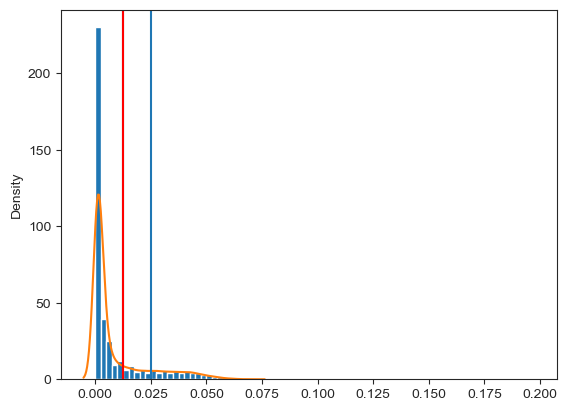

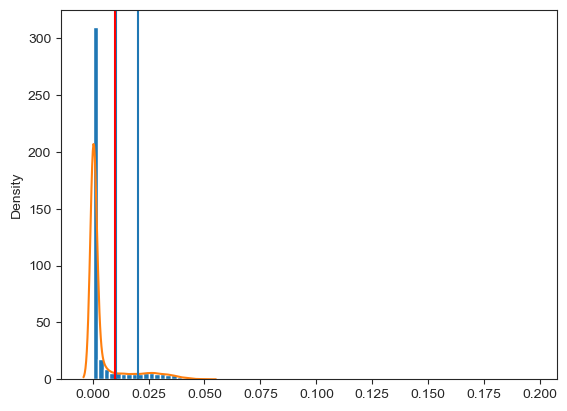

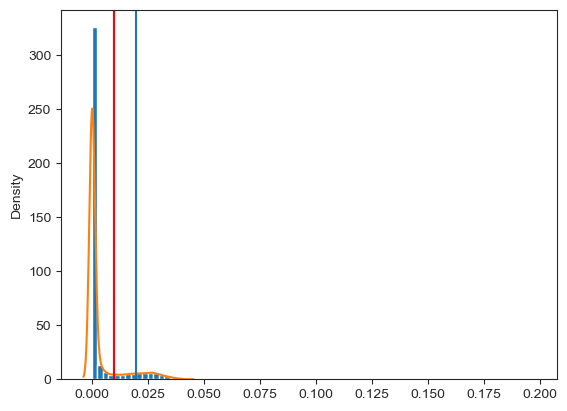

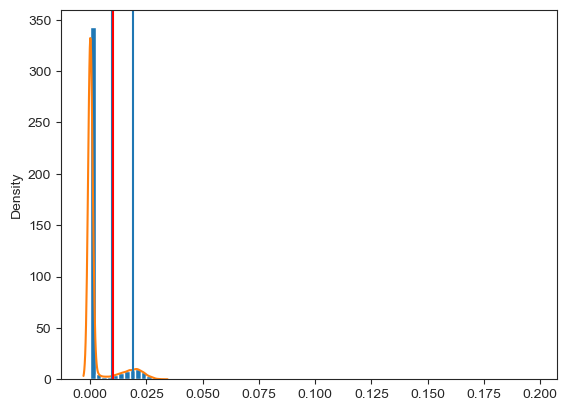

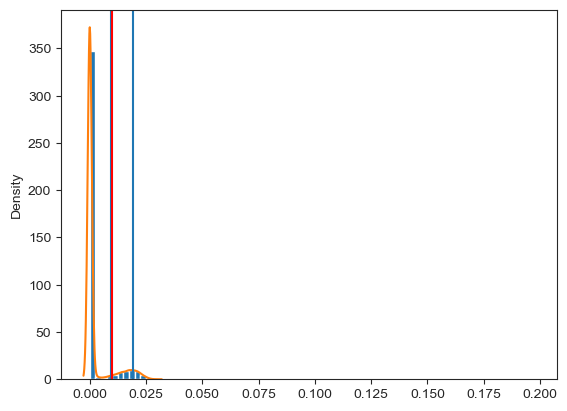

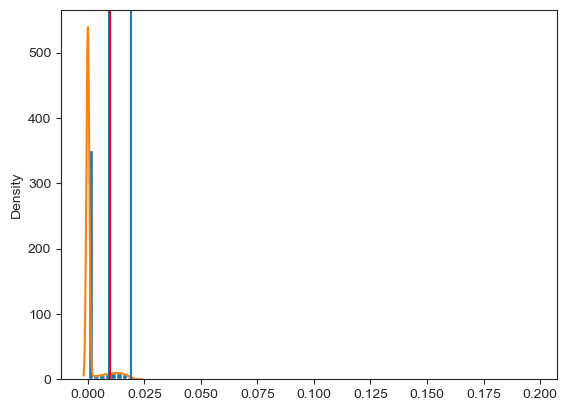

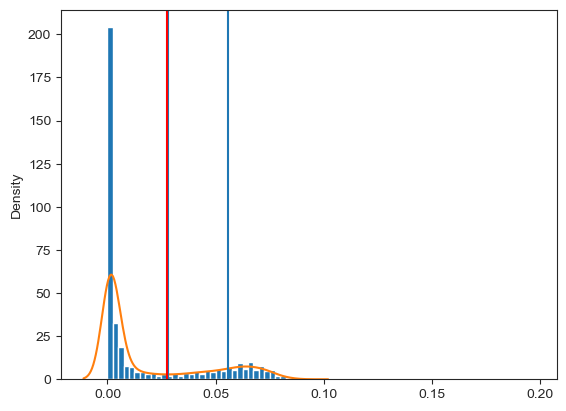

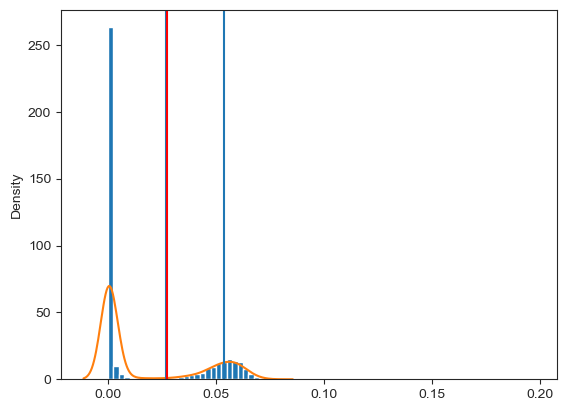

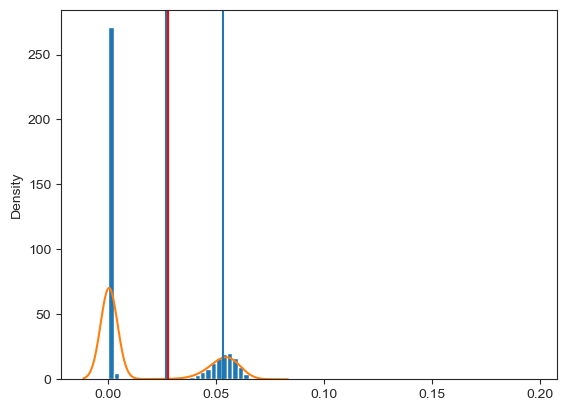

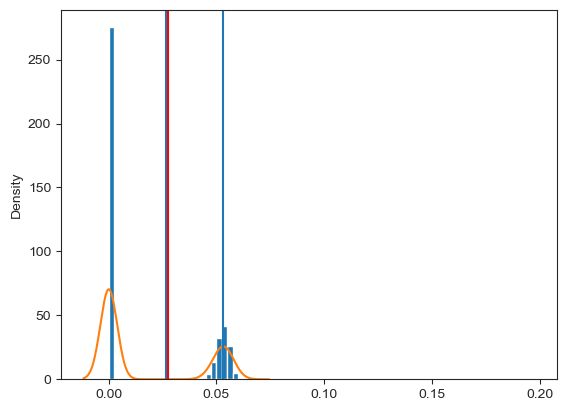

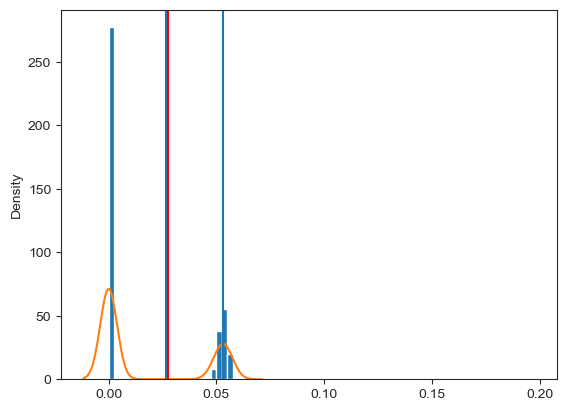

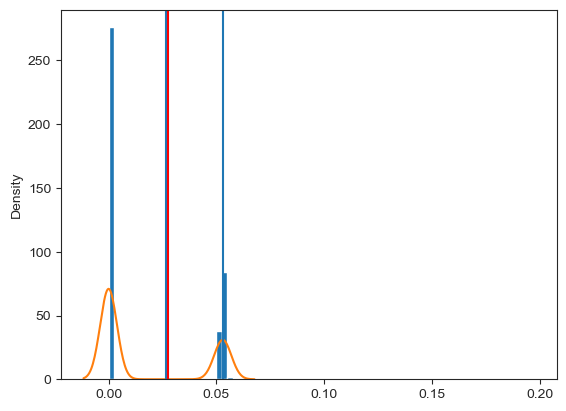

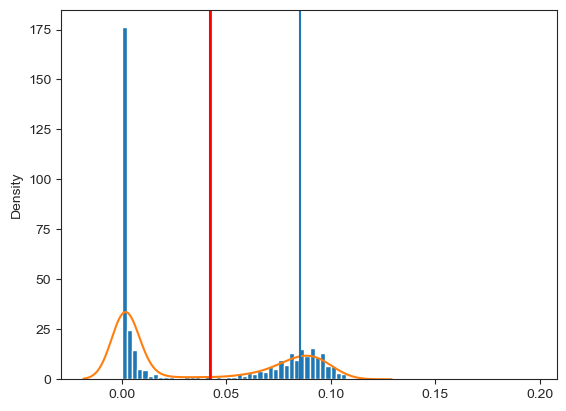

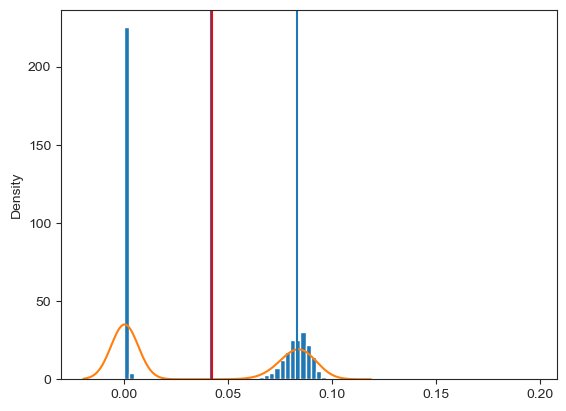

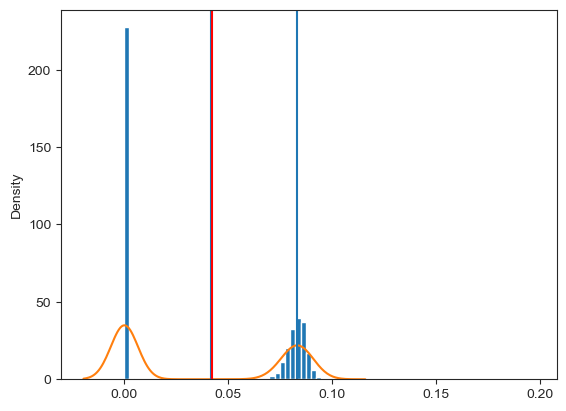

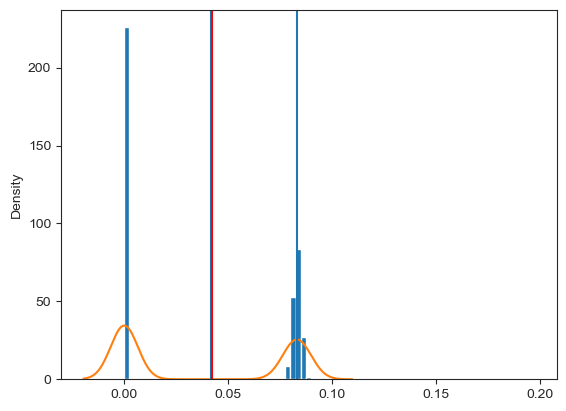

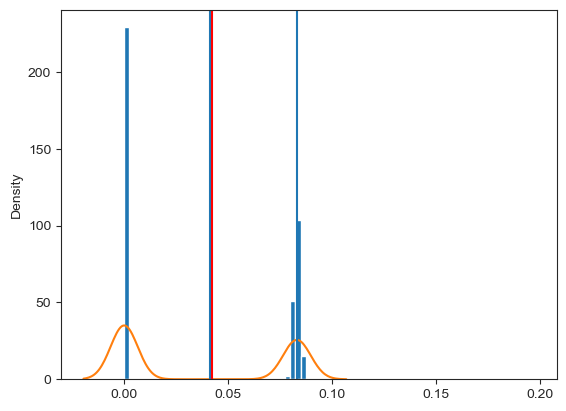

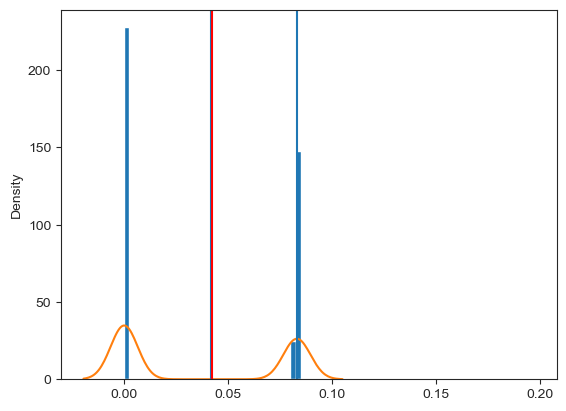

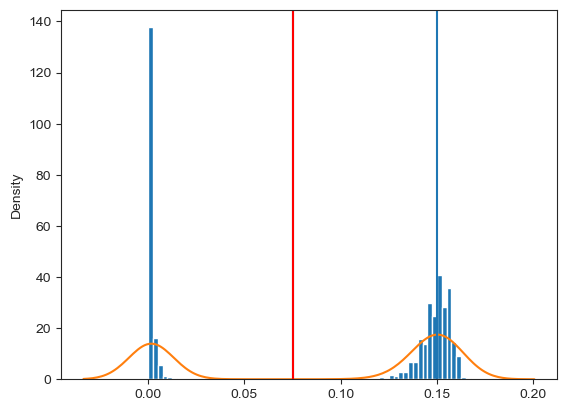

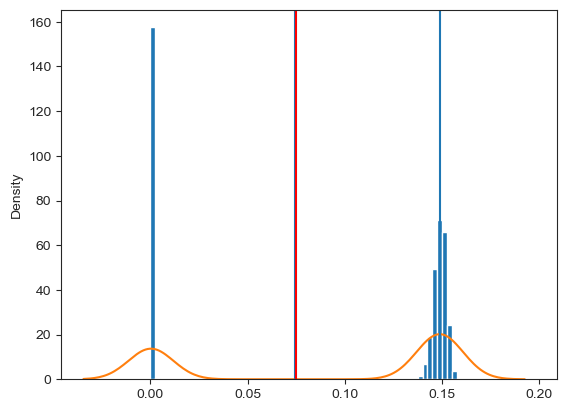

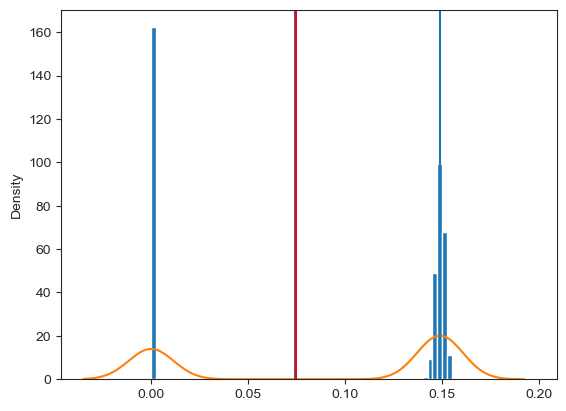

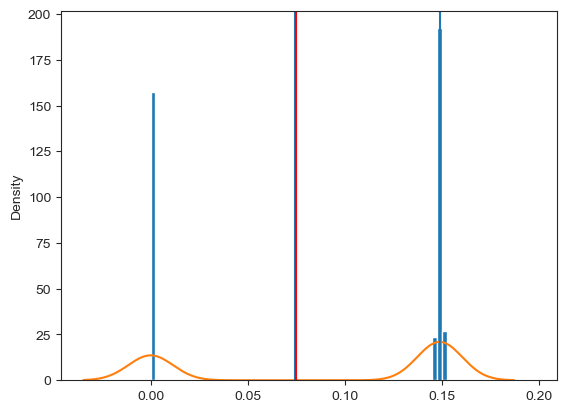

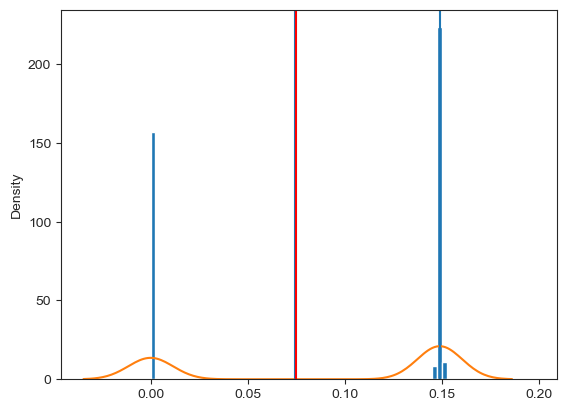

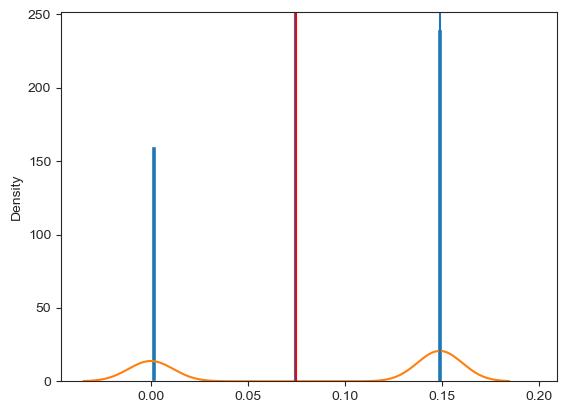

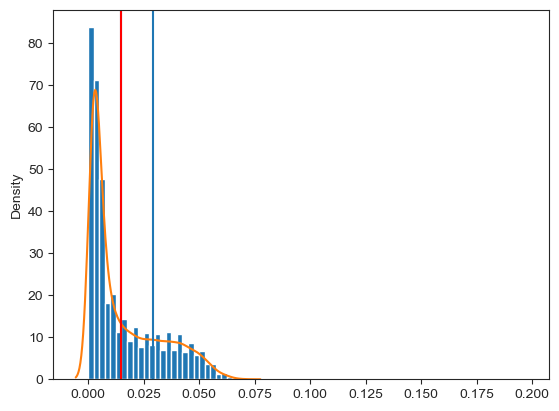

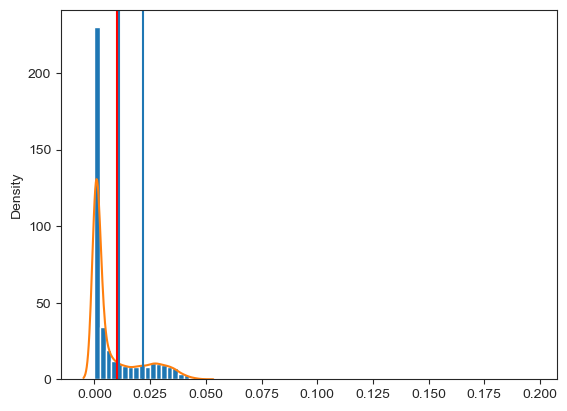

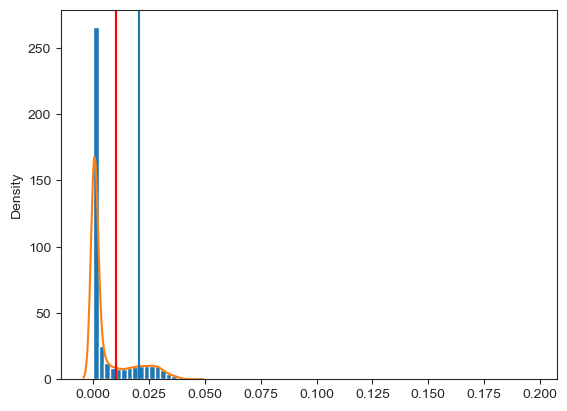

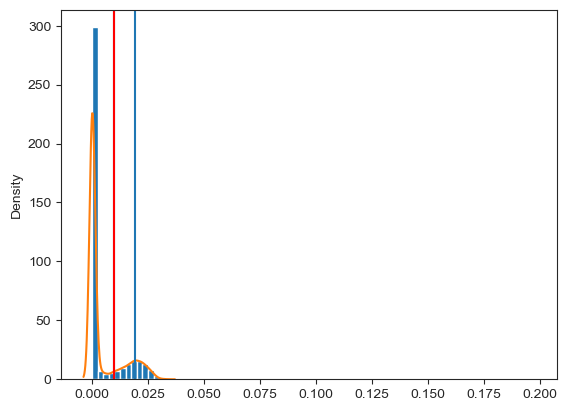

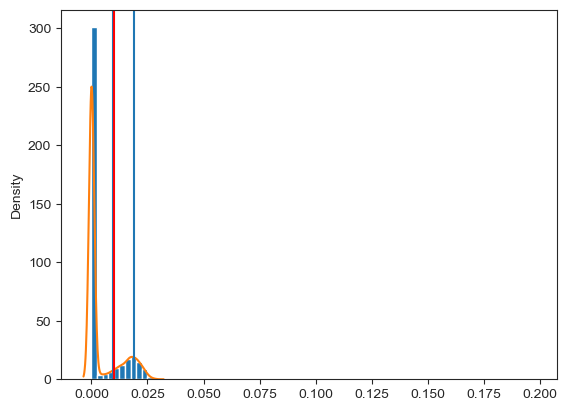

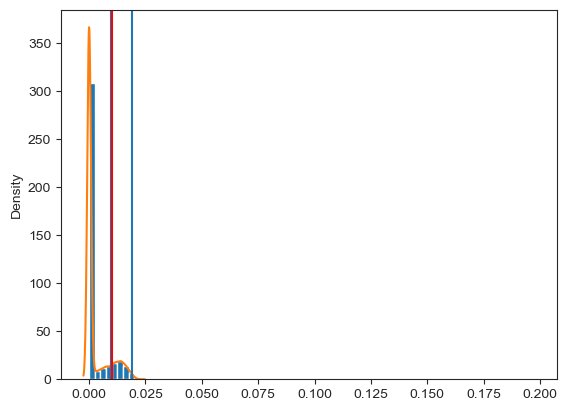

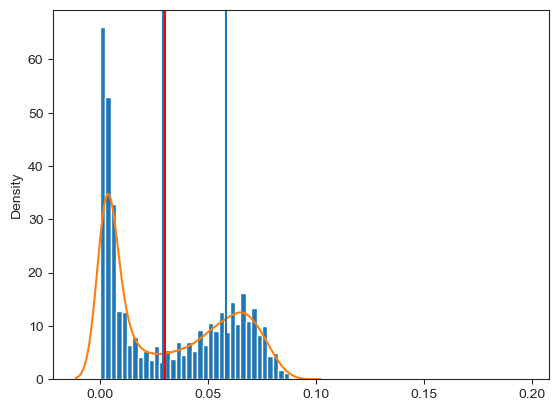

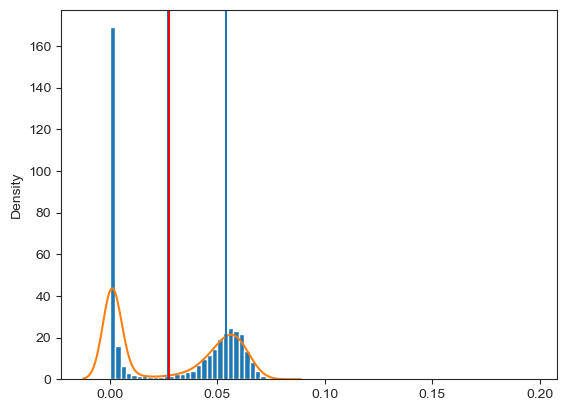

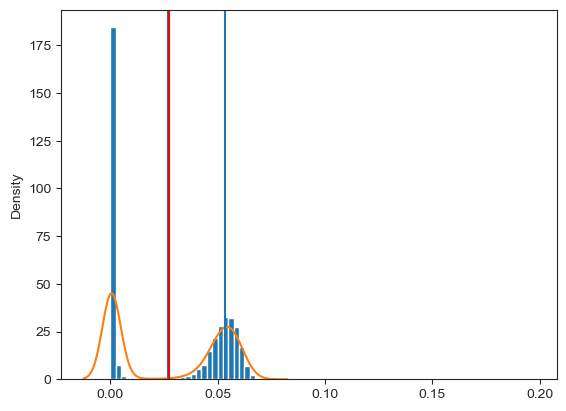

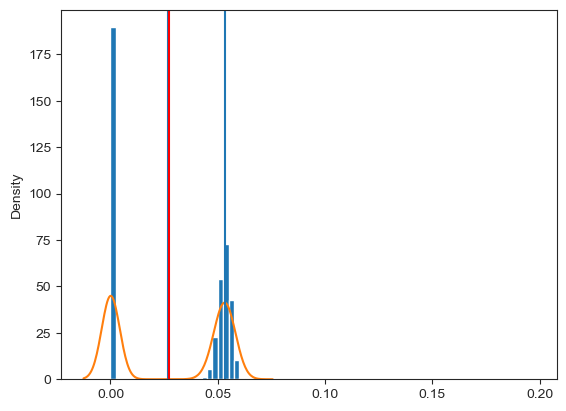

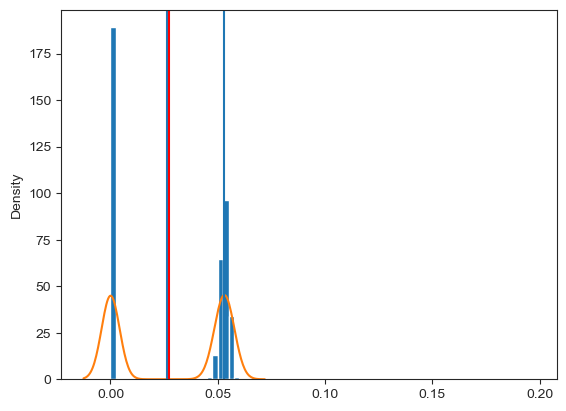

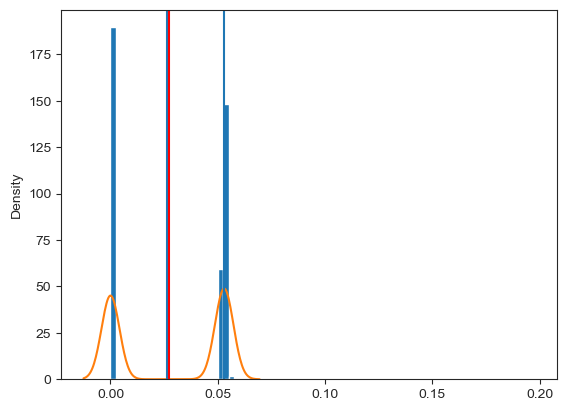

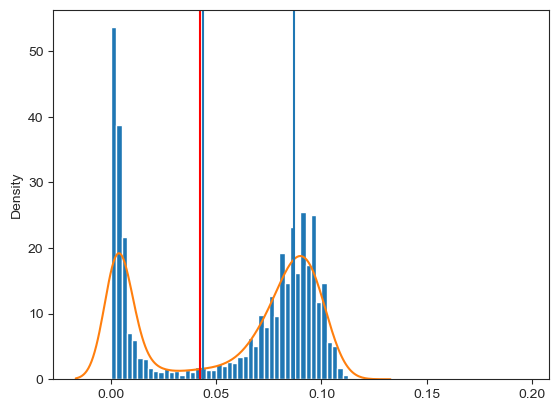

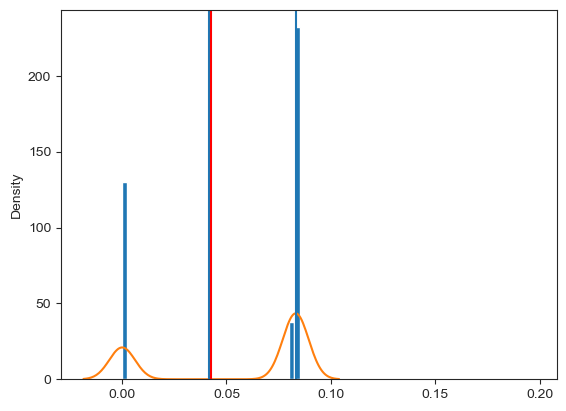

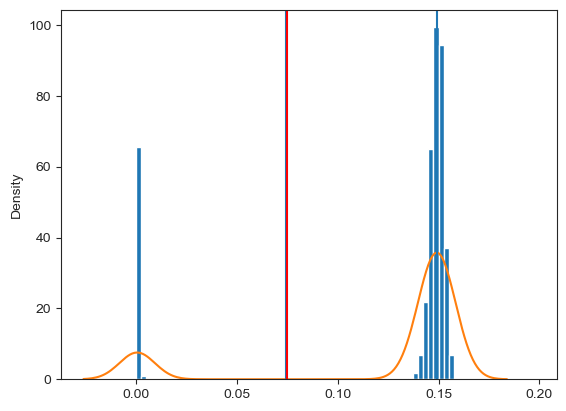

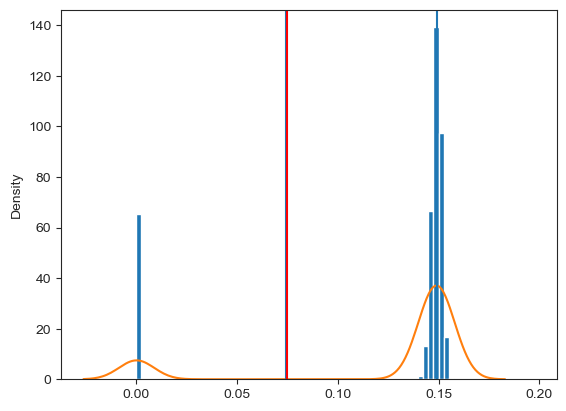

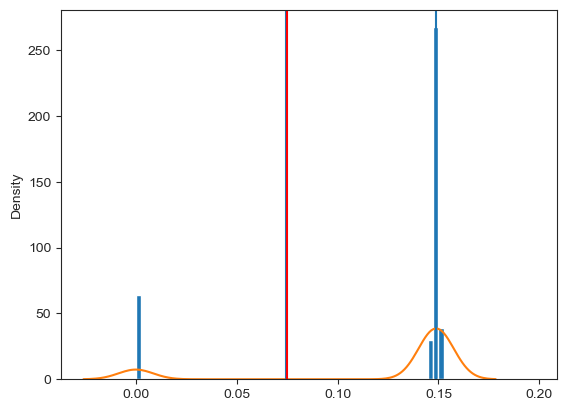

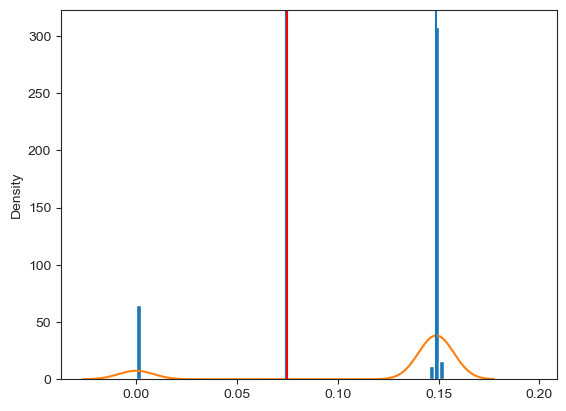

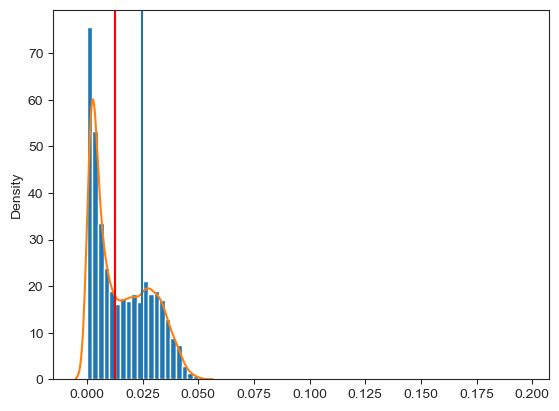

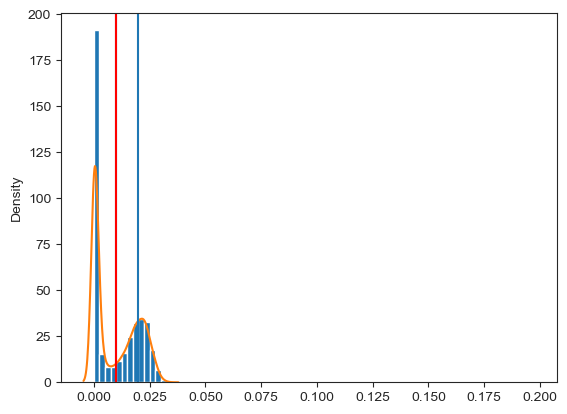

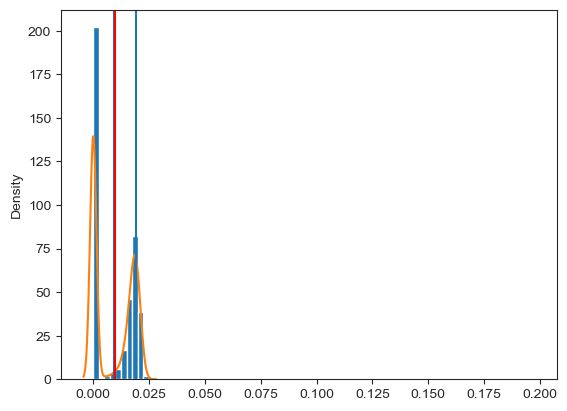

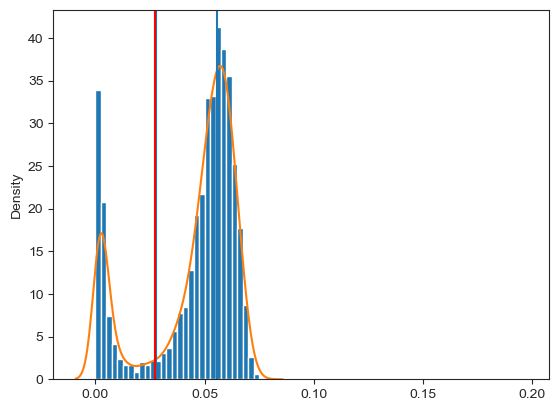

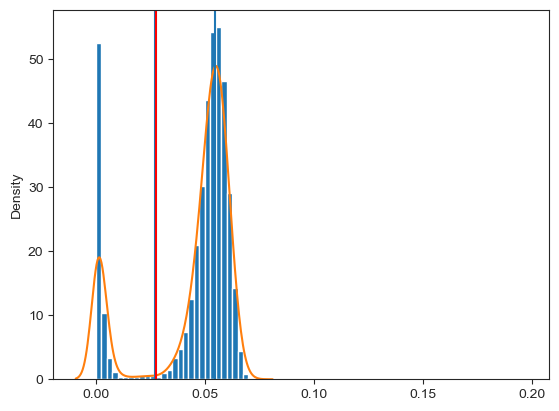

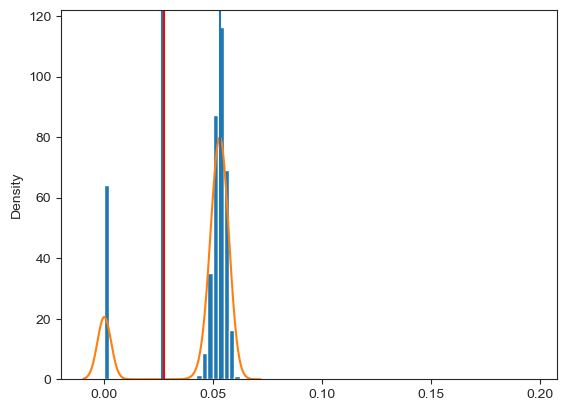

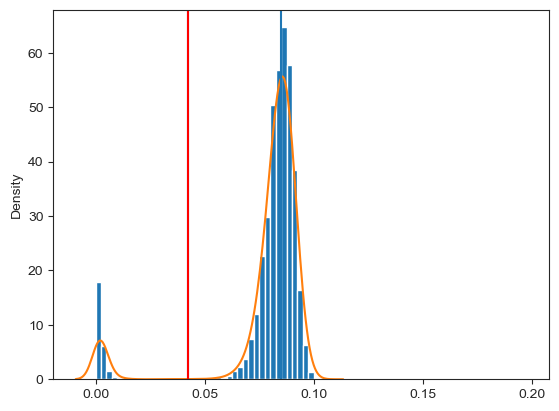

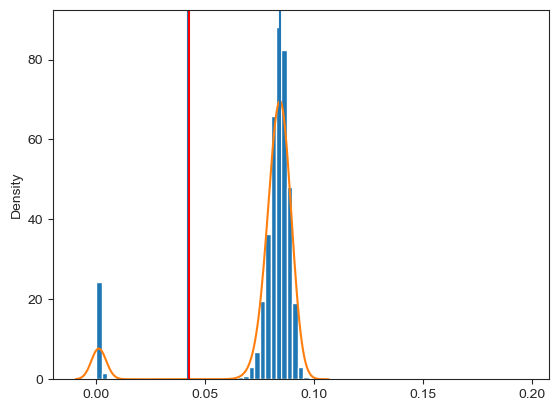

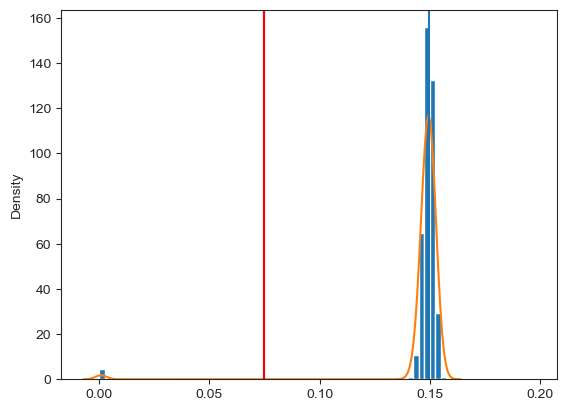

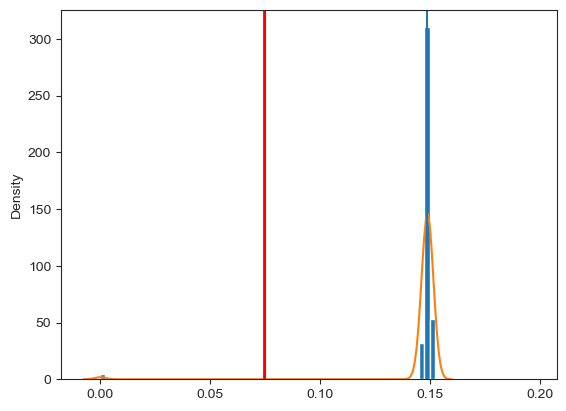

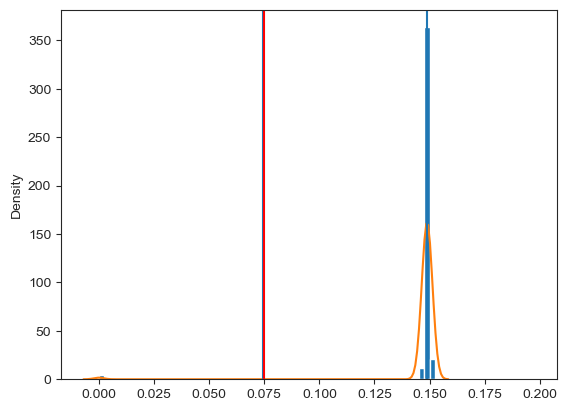

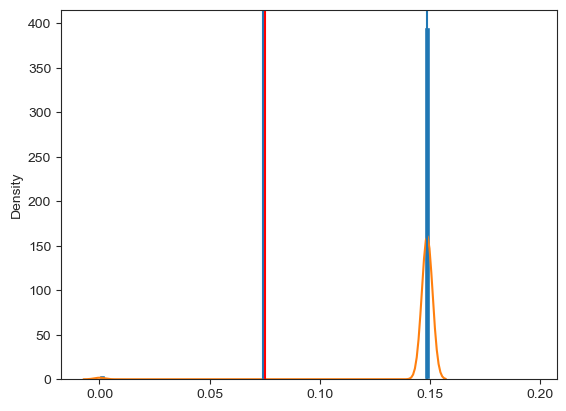

In [6]:
prob_total = [] # 3 elements, one for each propagation here
for i in range(len(props)): # for each number of propagations
    prob_props_tmp = []
    for j in range(len(eps_res)): # for each value of epsilon in this case
        file_name = 'measles/measles_'+str(eps_res[j])+suffix[i]+'GTP_fsize_inf_'+prefix[i]+'_'+str(eps_res[j])+'_500000.csv'
        df = np.loadtxt(file_name)
        prob_eps_res = []
        for k in range(len(N_vec)): # for each value of the population
            a = plt.hist(df[k]/N_vec[k], bins = np.arange(0,0.2,0.0025), density = True)
            sns.kdeplot(df[k]/N_vec[k])
            plt.axvline(cases(3,0.2,eps_res[j],props[i]/N_vec[k]))
            plt.axvline(cases(3,0.2,eps_res[j],props[i]/N_vec[k])/2)
            plt.axvline(a[1][np.argmin(abs(a[1]-(cases(3,0.2,eps_res[j],props[i]/N_vec[k])/2)))],color = 'red')
            nmin = np.argmin(abs(a[1]-(cases(3,0.2,eps_res[j],props[i]/N_vec[k])/2)))
            prob = np.sum(0.0025*(a[0][0:nmin]))
            prob_eps_res.append(prob)
            plt.show()
        prob_props_tmp.append(prob_eps_res)
    prob_total.append(prob_props_tmp)  
    

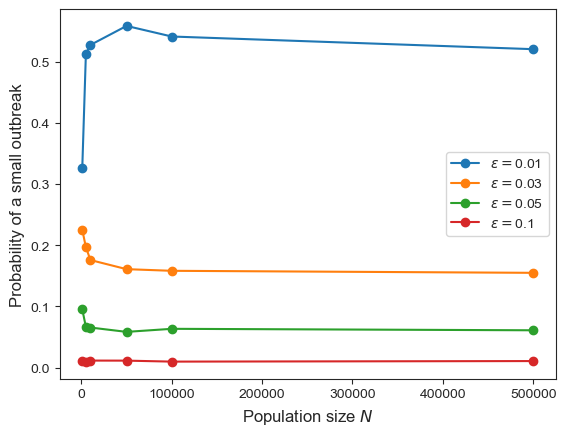

In [7]:
for i in range(len(props)):
    for j in range(len(eps_res)):
        plt.plot(N_vec, prob_total[i][j], '-o',label = r'$\epsilon = $'+str(eps_res[j]))
    plt.xlabel(r'Population size $N$', fontsize = 12)
    plt.ylabel('Probability of a small outbreak', fontsize = 12)
    #plt.yscale('log')
    plt.legend()
    plt.show()

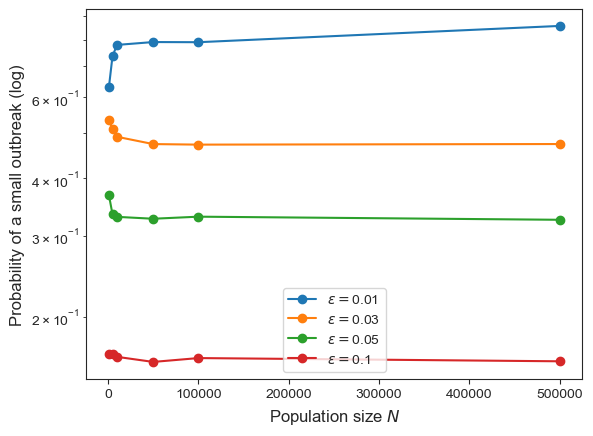

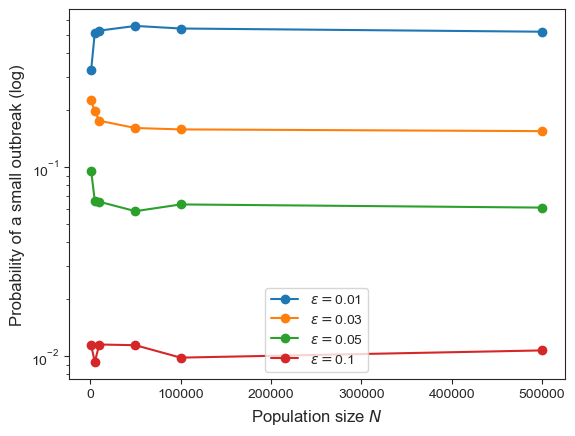

In [8]:
for i in range(len(props)):
    for j in range(len(eps_res)):
        plt.plot(N_vec, prob_total[i][j], '-o',label = r'$\epsilon = $'+str(eps_res[j]))
    plt.xlabel(r'Population size $N$', fontsize = 12)
    plt.ylabel('Probability of a small outbreak (log)', fontsize = 12)
    plt.yscale('log')
    plt.legend()
    plt.show()

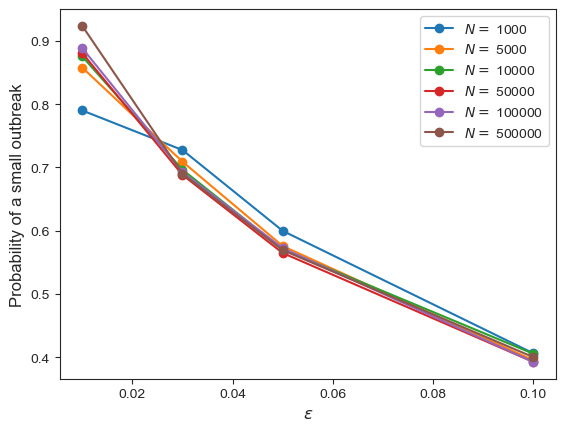

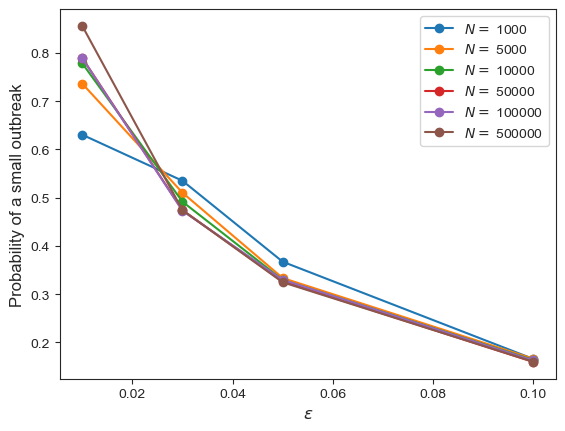

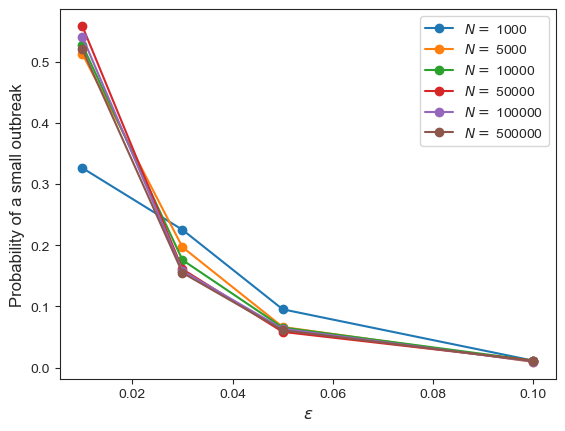

In [9]:
for i in range(len(props)):
    res_eps = np.array(prob_total[i]).transpose()
    for j in range(len(N_vec)):
        plt.plot(eps_res,res_eps[j,:], '-o', label = r'$N =$ '+str(N_vec[j]))
    plt.xlabel(r'$\epsilon$', fontsize = 12)
    plt.ylabel('Probability of a small outbreak', fontsize = 12)
    plt.legend()
    plt.show()

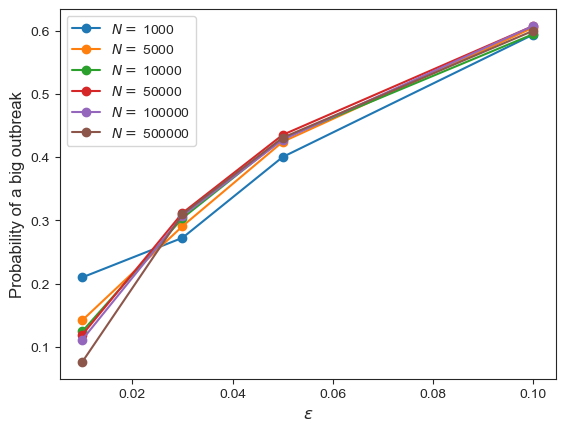

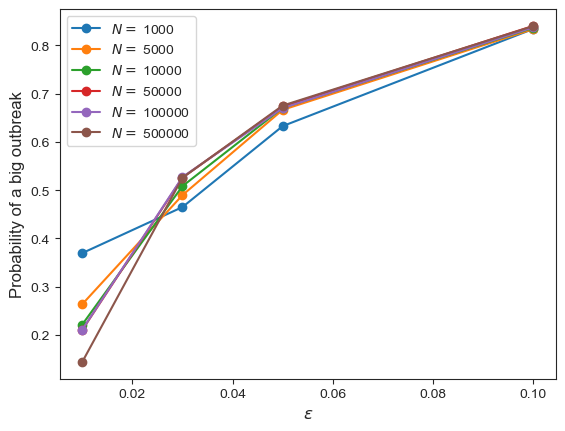

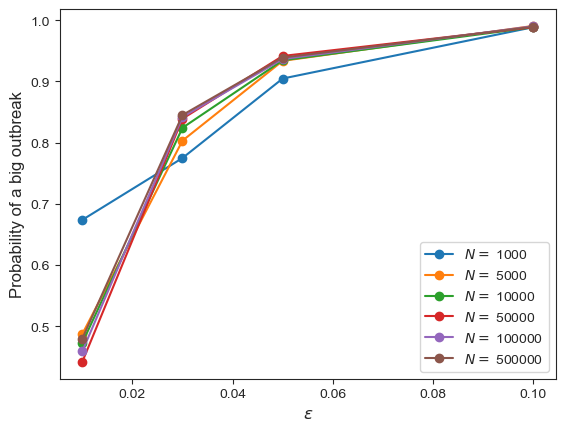

In [11]:
for i in range(len(props)):
    res_eps = np.array(prob_total[i]).transpose()
    for j in range(len(N_vec)):
        plt.plot(eps_res,1-res_eps[j,:], '-o', label = r'$N =$ '+str(N_vec[j]))
    plt.xlabel(r'$\epsilon$', fontsize = 12)
    plt.ylabel('Probability of a big outbreak', fontsize = 12)
    plt.legend()
    plt.show()

### Comparing the binomial probability hypothesis (mean)

In [12]:
probs_1prop = prob_total[0]
probs_2prop = prob_total[1]
probs_5prop = prob_total[2]

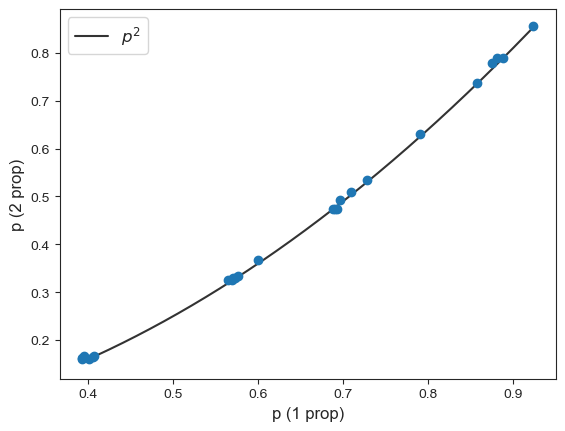

In [13]:
x_min = min(np.array(probs_1prop).flatten())
x_max = max(np.array(probs_1prop).flatten())
x = np.linspace(x_min,x_max,1000)
plt.plot(x, x**2, '-k', alpha = 0.8, label = r'$p^2$')
plt.plot(np.array(probs_1prop).flatten(),np.array(probs_2prop).flatten(),'o')
plt.xlabel('p (1 prop)', fontsize = 12)
plt.ylabel('p (2 prop)', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

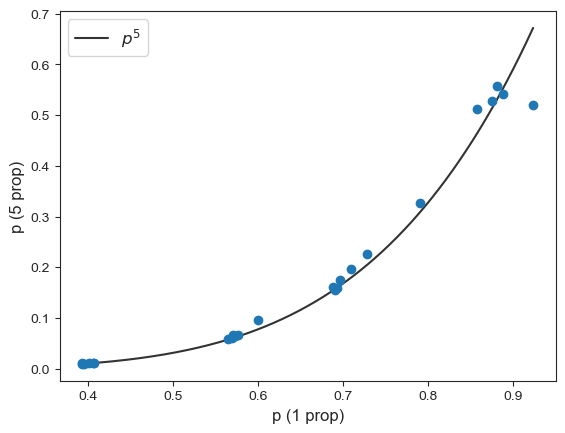

In [14]:
x_min = min(np.array(probs_1prop).flatten())
x_max = max(np.array(probs_1prop).flatten())
x = np.linspace(x_min,x_max,1000)
plt.plot(x, x**5, '-k', alpha = 0.8, label = r'$p^5$')
plt.plot(np.array(probs_1prop).flatten(),np.array(probs_5prop).flatten(),'o')
plt.xlabel('p (1 prop)', fontsize = 12)
plt.ylabel('p (5 prop)', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

### Comparing the binomial probability hypothesis (different N)

In [15]:
probs_1prop = prob_total[0]
probs_2prop = prob_total[1]
probs_5prop = prob_total[2]

In [16]:
probs_1prop = np.array(probs_1prop)
probs_2prop = np.array(probs_2prop)
probs_5prop = np.array(probs_5prop)

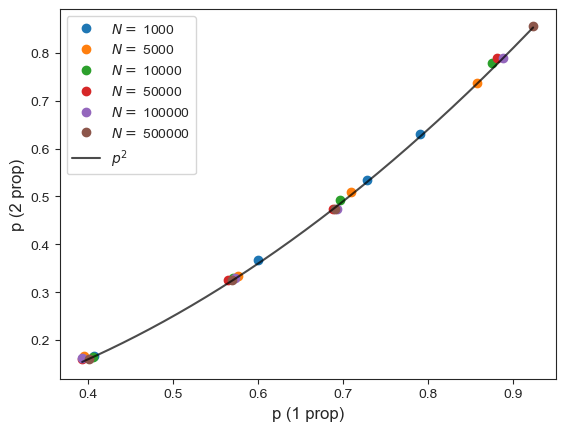

In [17]:
x_min = min(probs_1prop.flatten())
x_max = max(probs_1prop.flatten())
x = np.linspace(x_min,x_max,1000)
for i in range(len(N_vec)):
    plt.plot(probs_1prop[:,i],probs_2prop[:,i],'o',label = r'$N = $ '+str(N_vec[i]))
plt.plot(x, x**2, '-k', alpha = 0.7, label = r'$p^2$')
plt.xlabel('p (1 prop)', fontsize = 12)
plt.ylabel('p (2 prop)', fontsize = 12)
plt.legend()
plt.show()

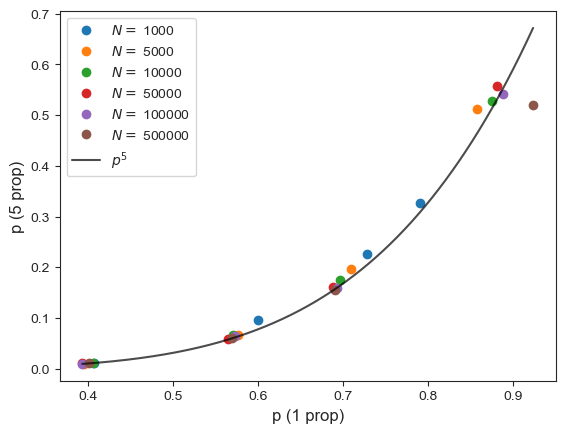

In [18]:
x_min = min(probs_1prop.flatten())
x_max = max(probs_1prop.flatten())
x = np.linspace(x_min,x_max,1000)
for i in range(len(N_vec)):
    plt.plot(probs_1prop[:,i],probs_5prop[:,i],'o',label = r'$N = $ '+str(N_vec[i]))
plt.plot(x, x**5, '-k', alpha = 0.7, label = r'$p^5$')
plt.xlabel('p (1 prop)', fontsize = 12)
plt.ylabel('p (5 prop)', fontsize = 12)
plt.legend()
plt.show()

## Calculating prop infected for big and small outbreaks (total)

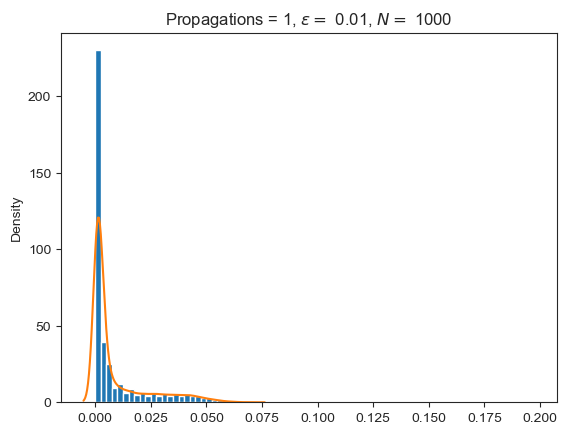

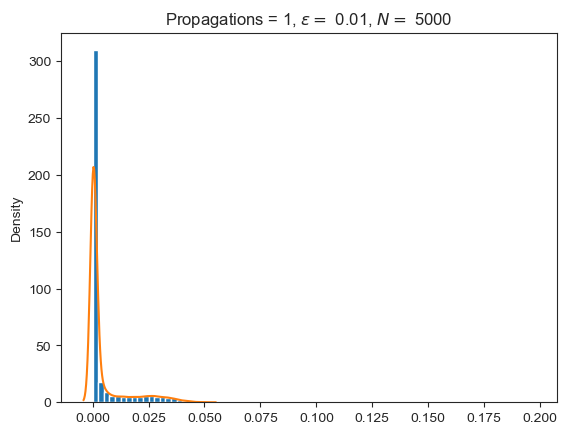

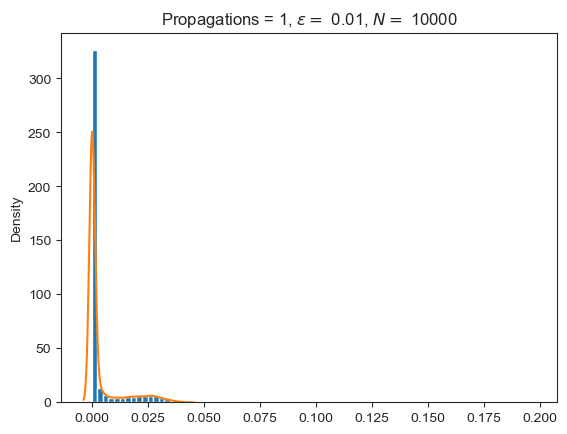

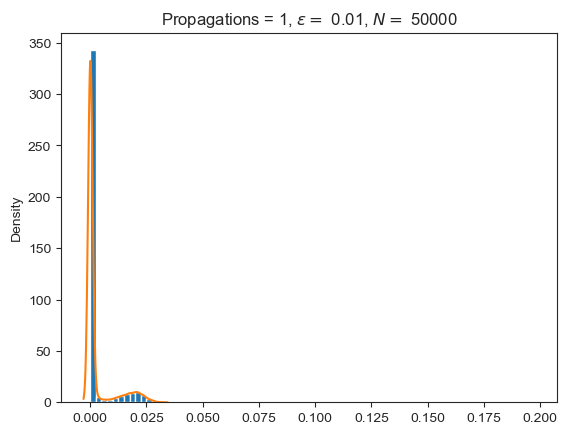

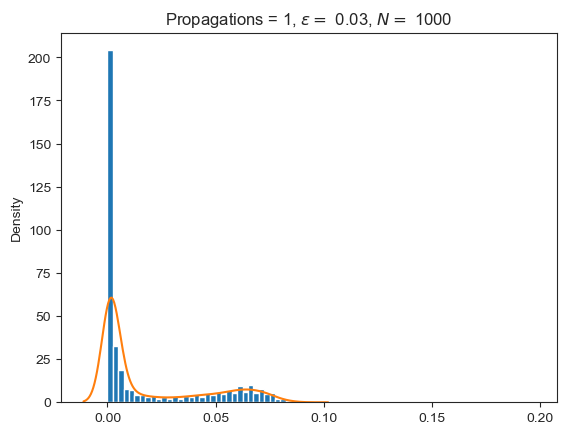

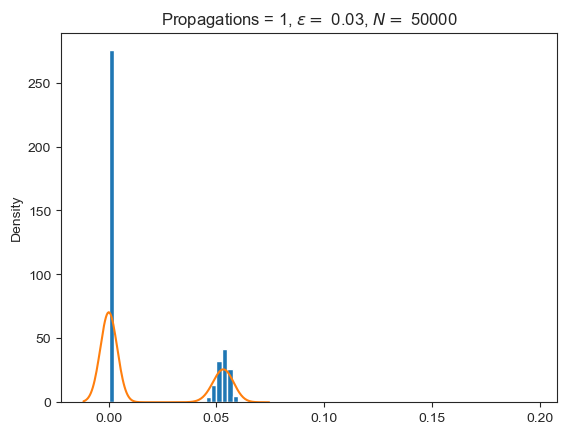

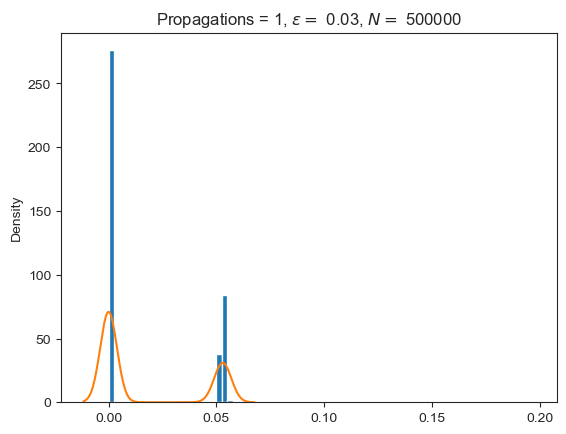

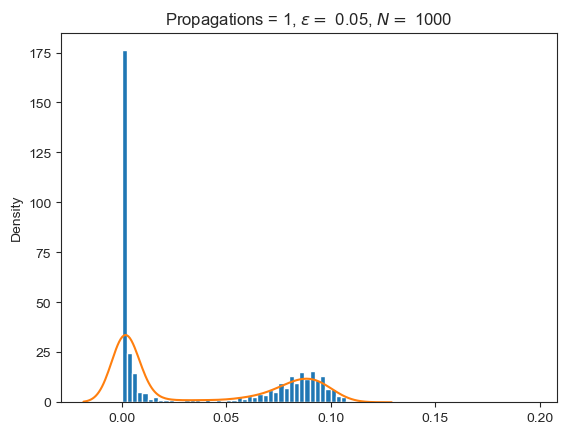

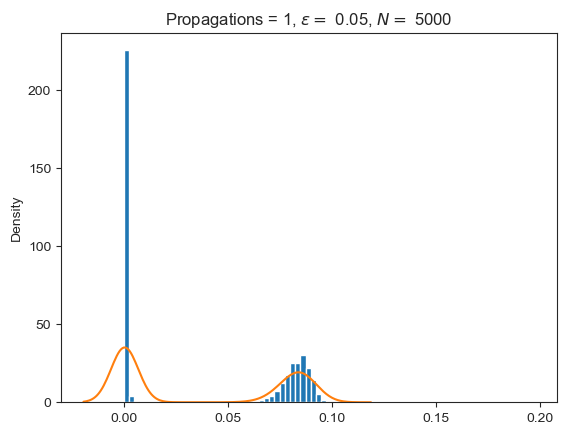

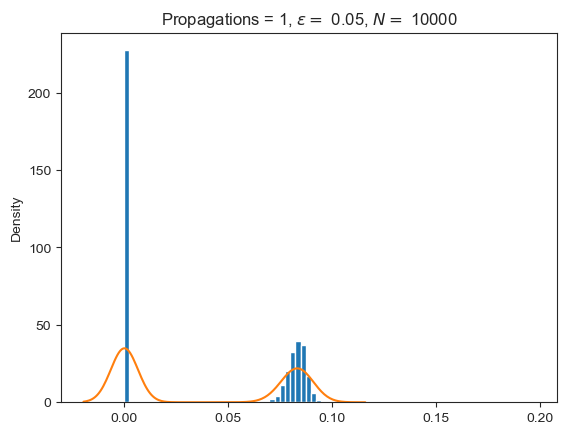

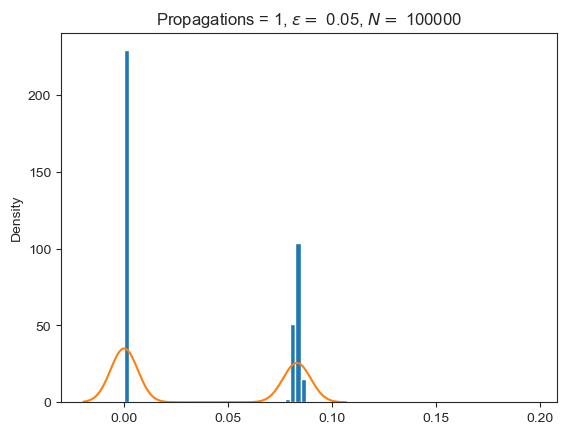

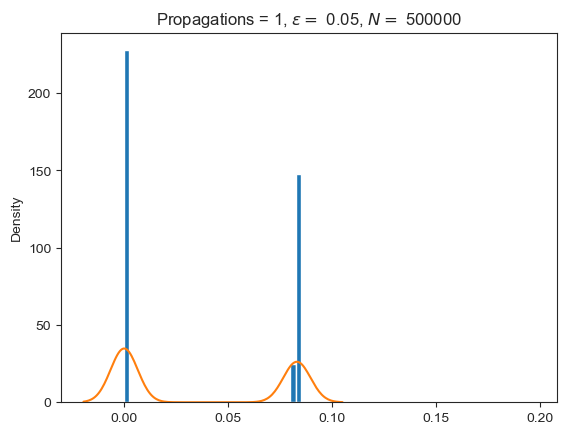

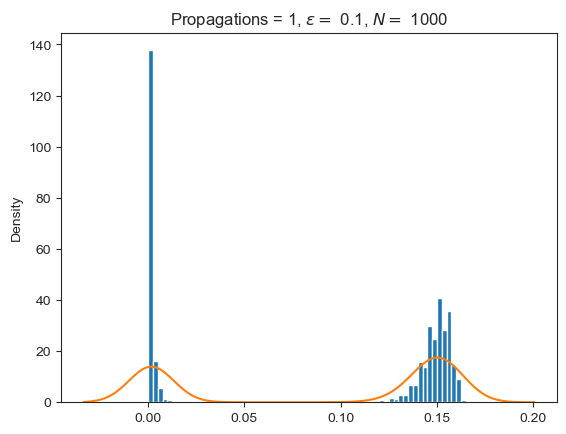

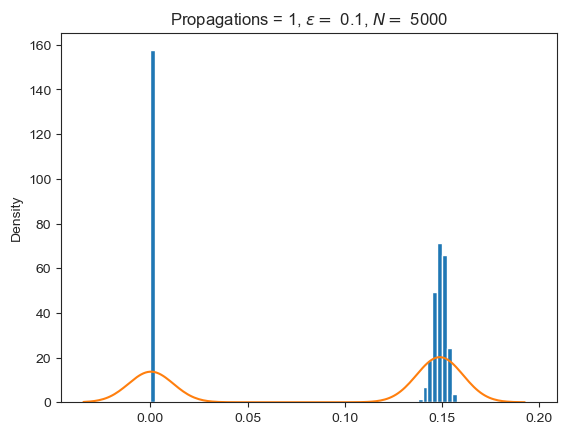

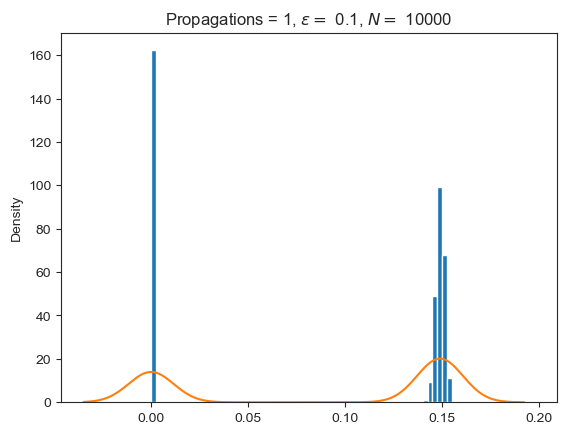

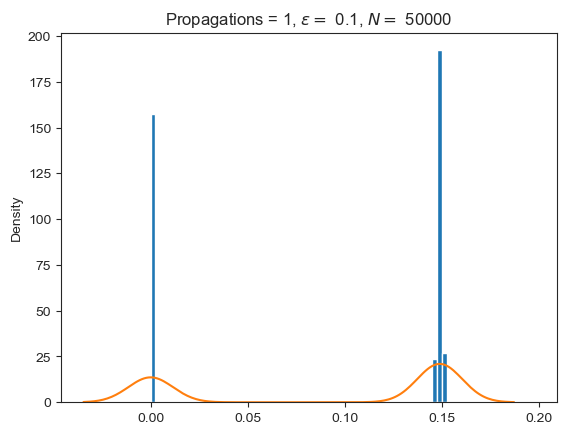

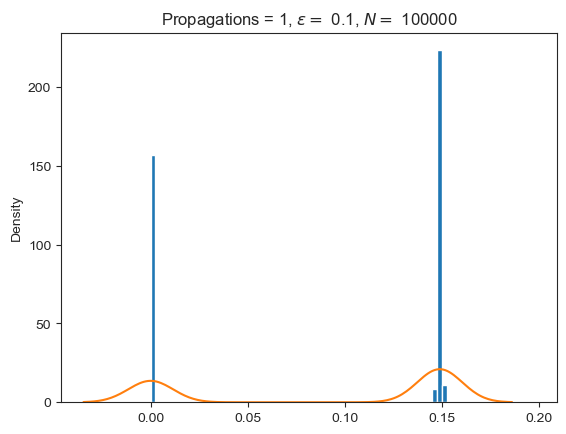

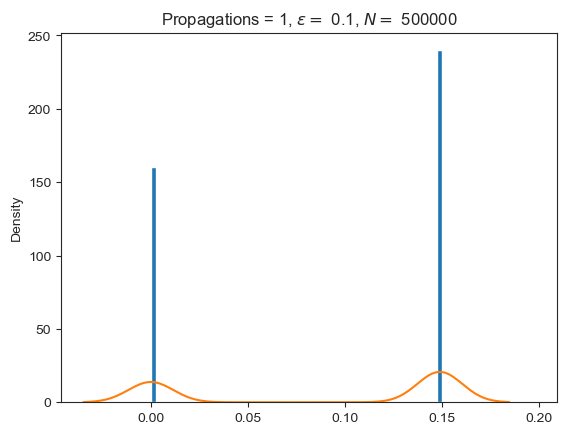

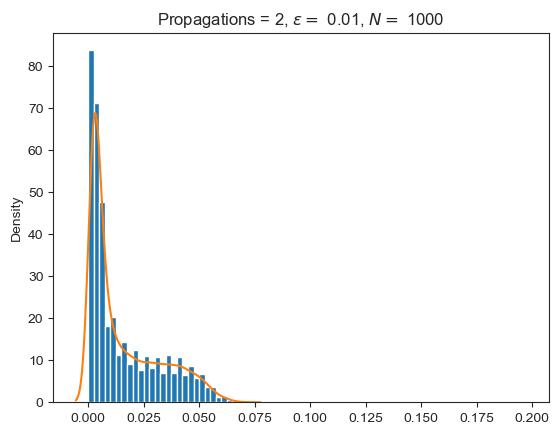

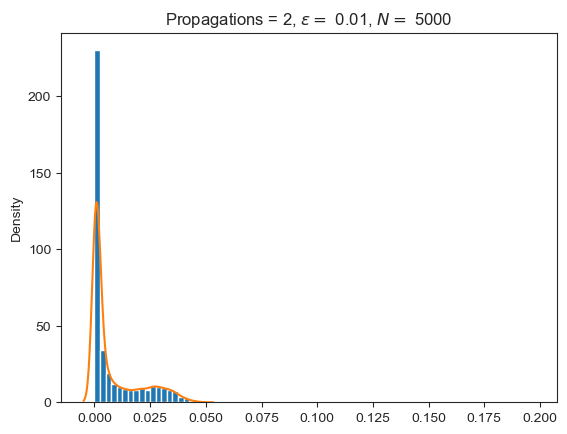

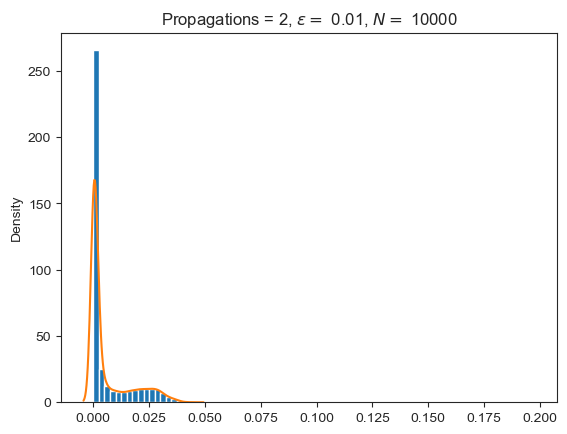

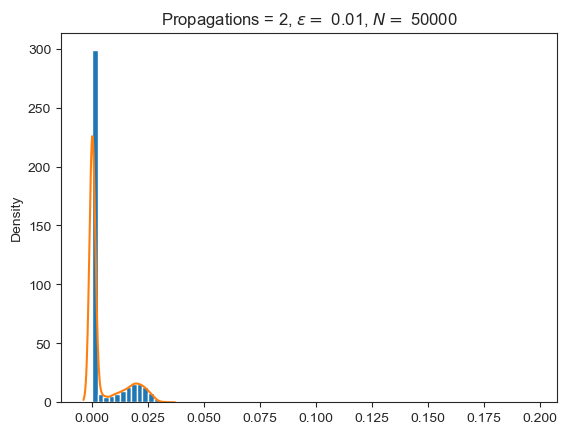

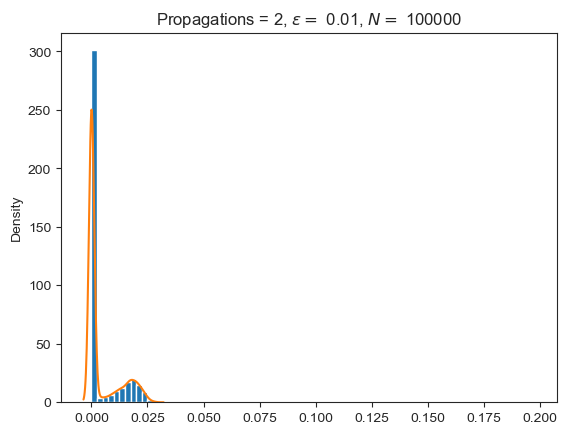

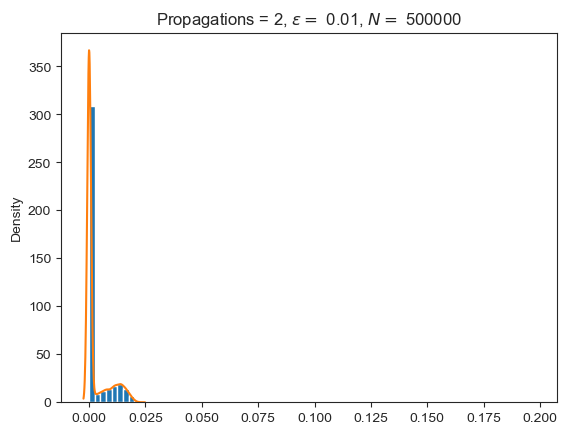

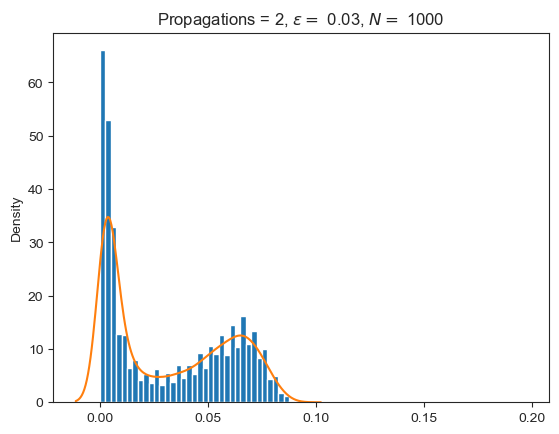

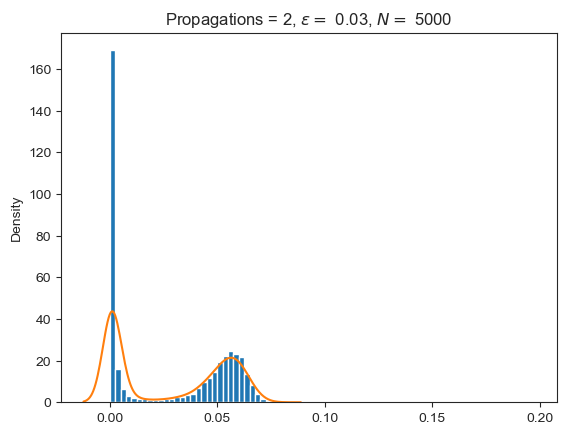

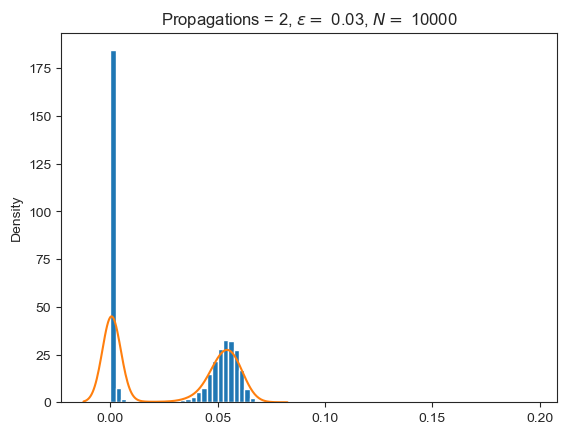

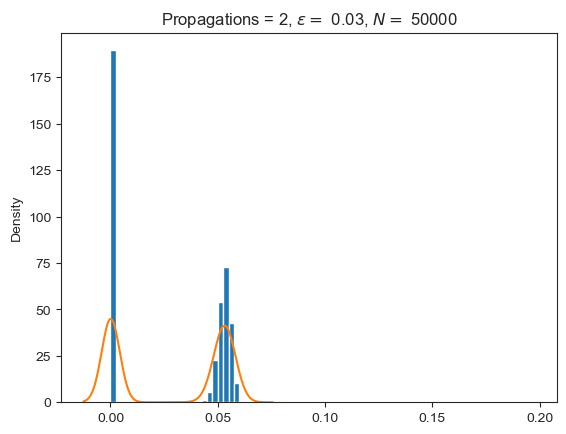

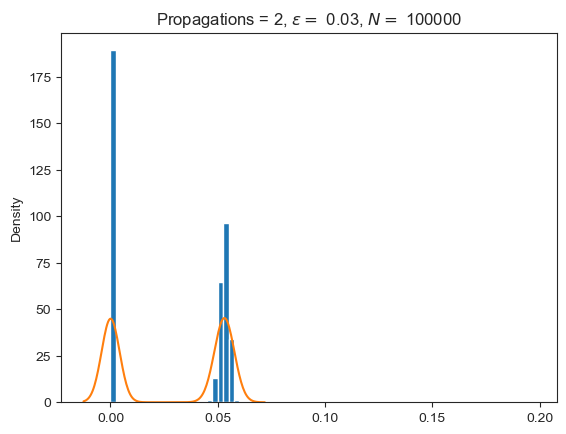

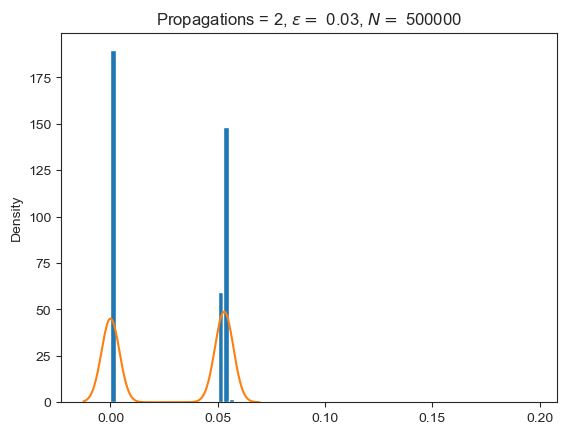

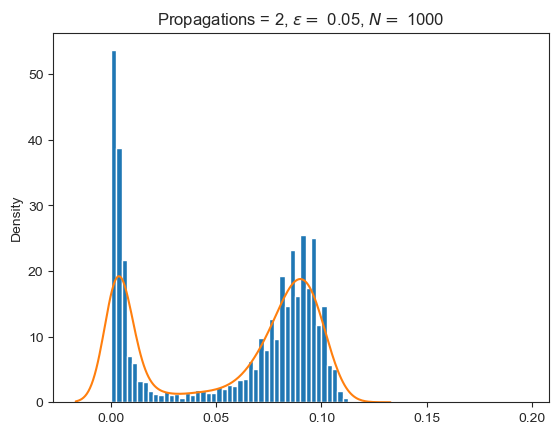

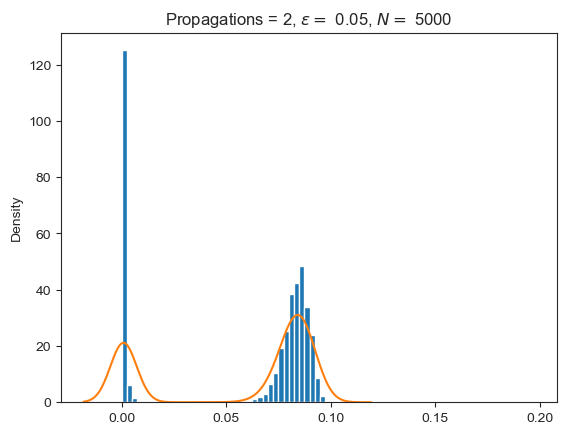

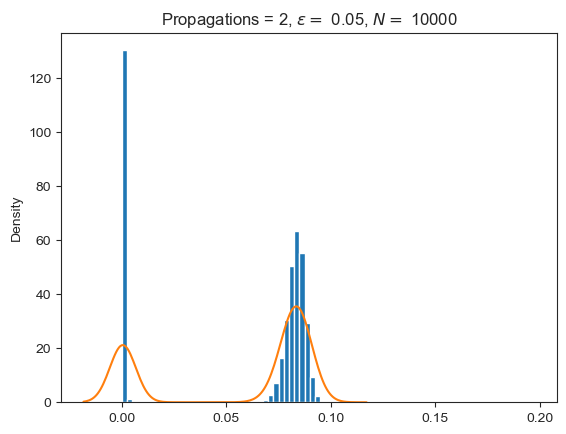

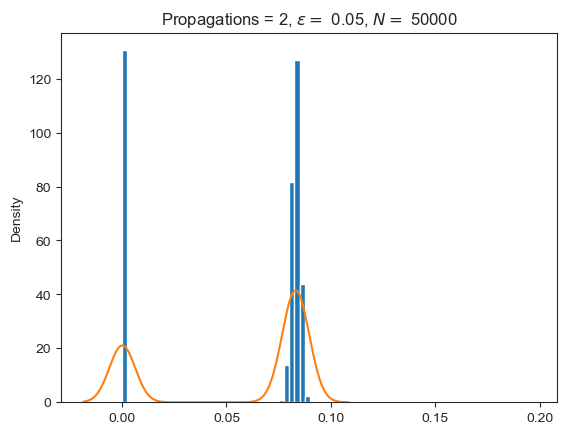

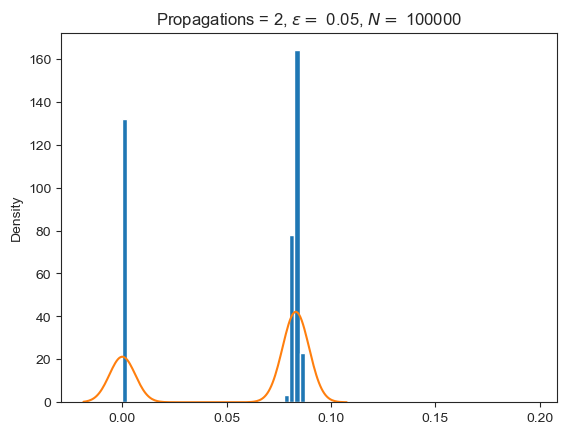

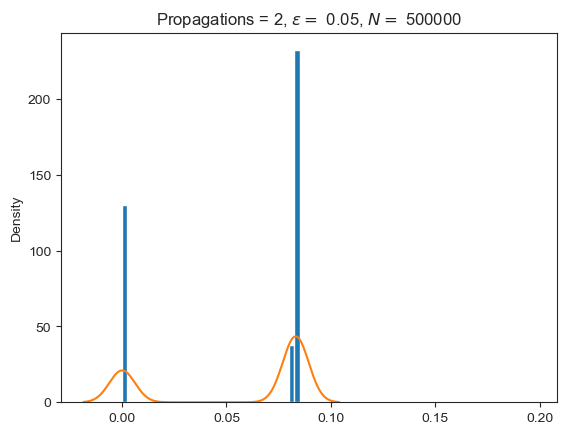

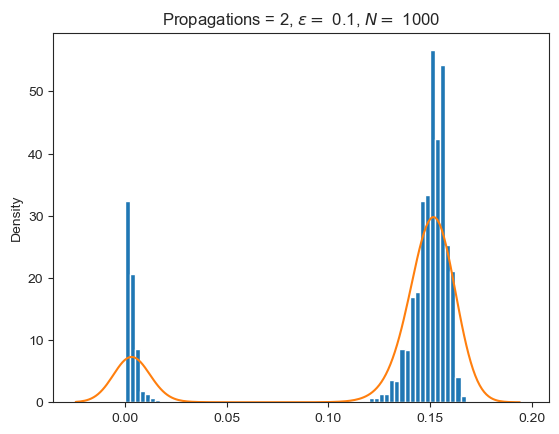

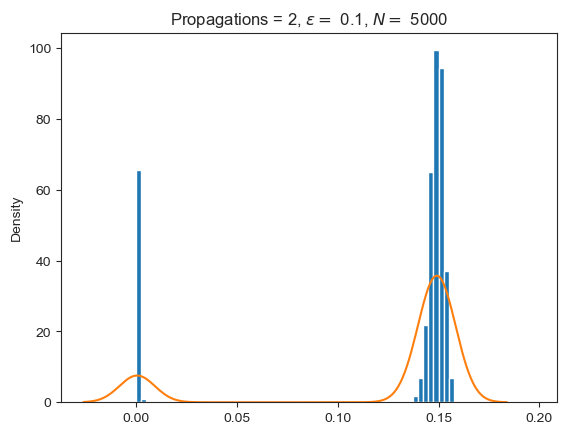

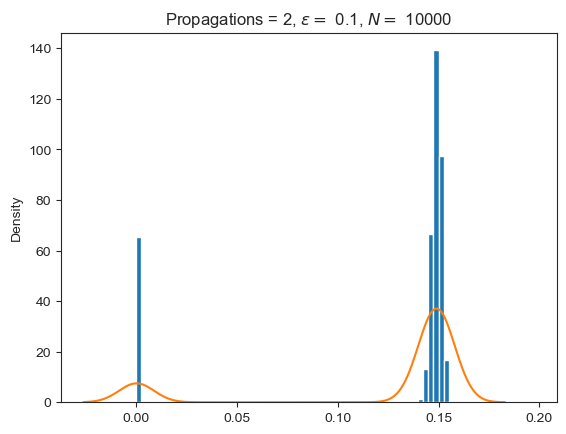

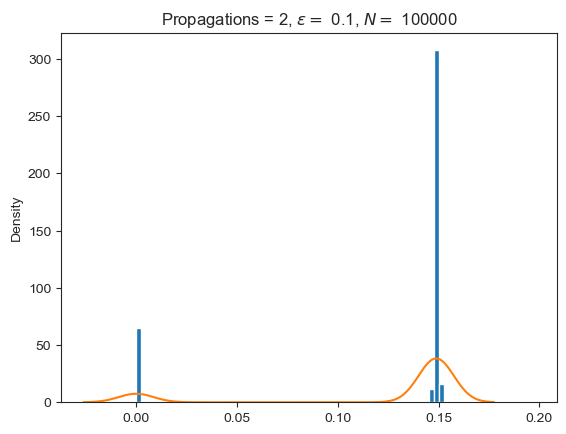

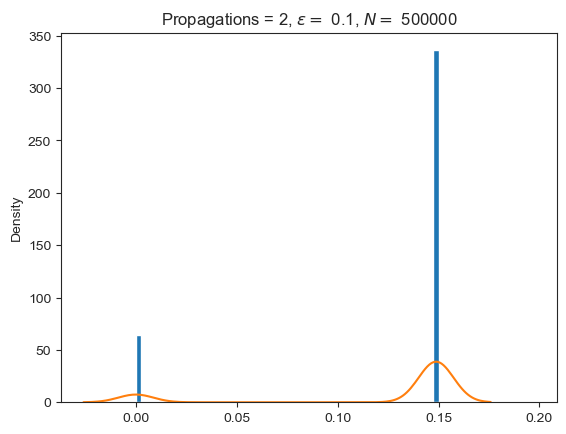

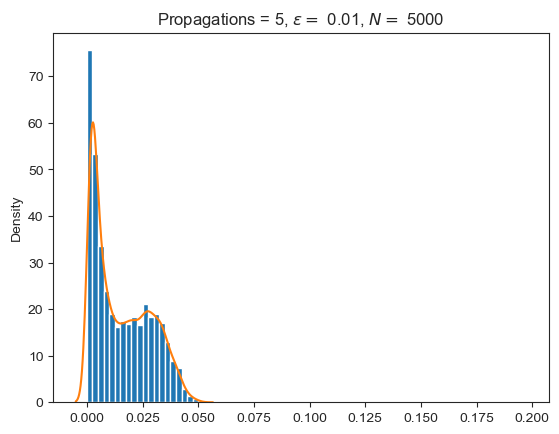

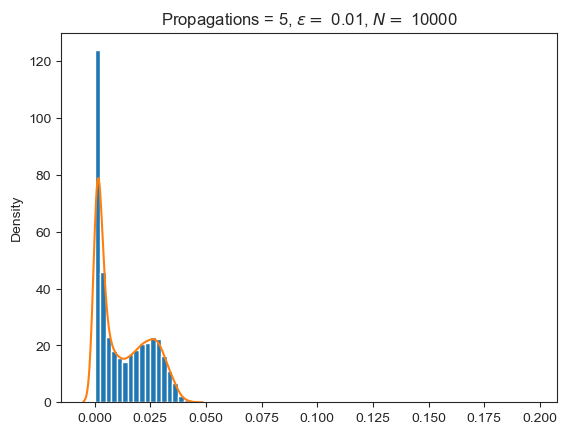

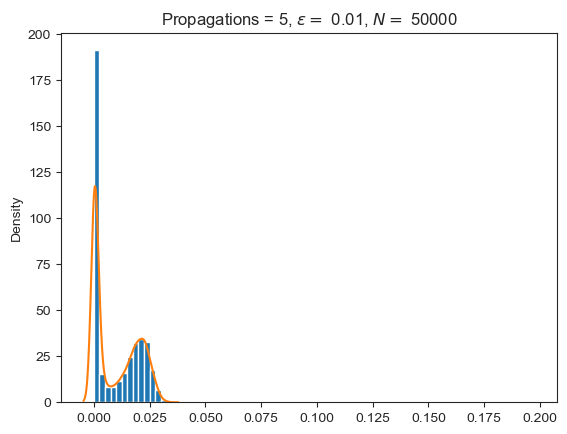

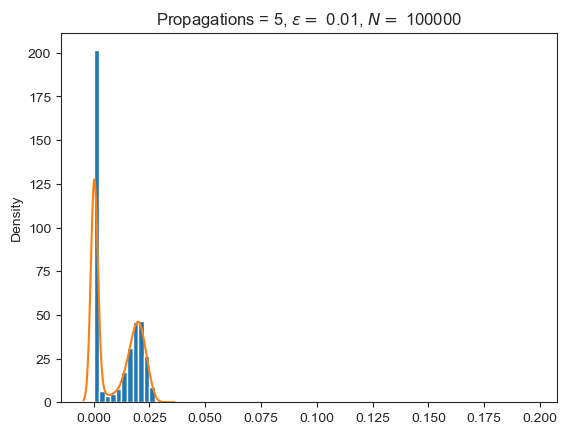

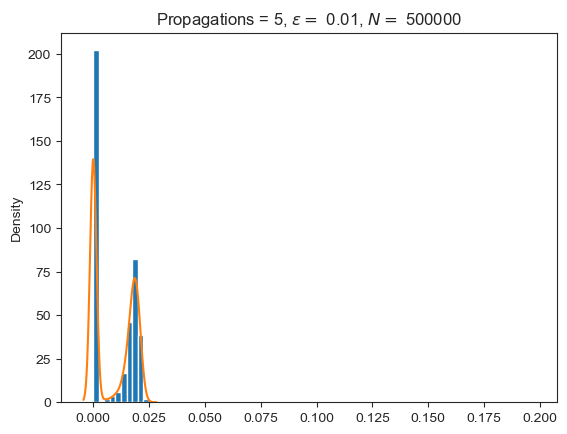

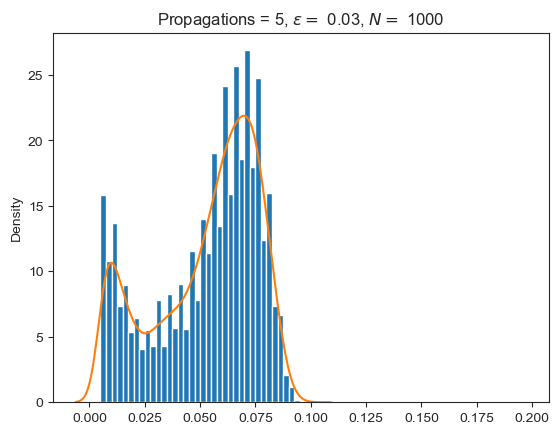

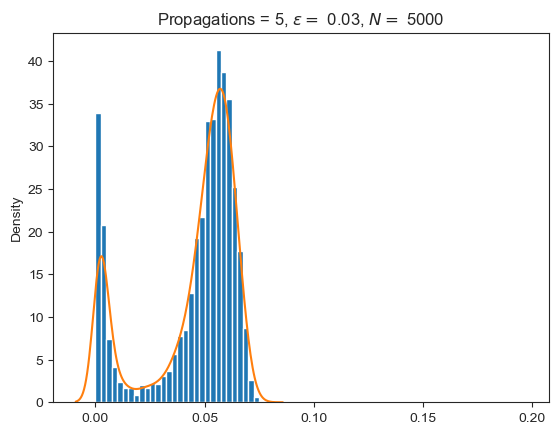

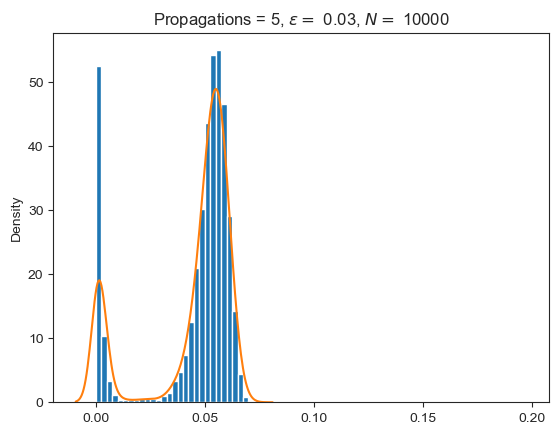

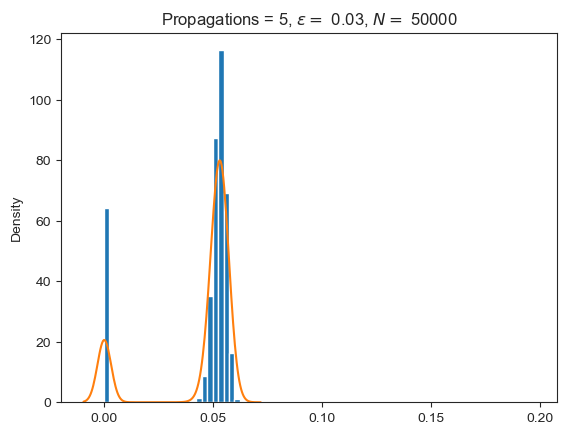

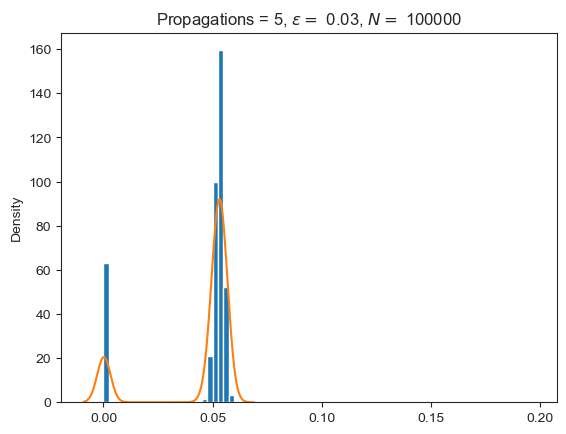

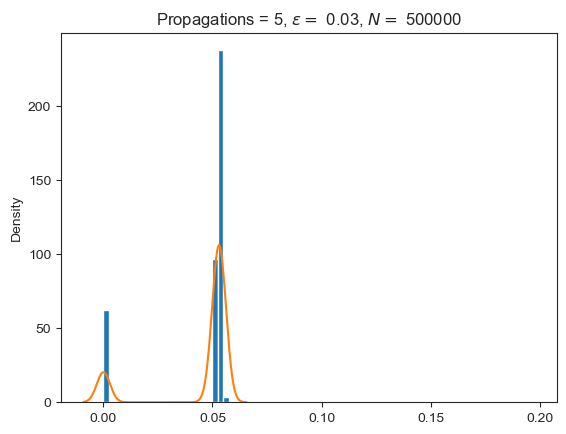

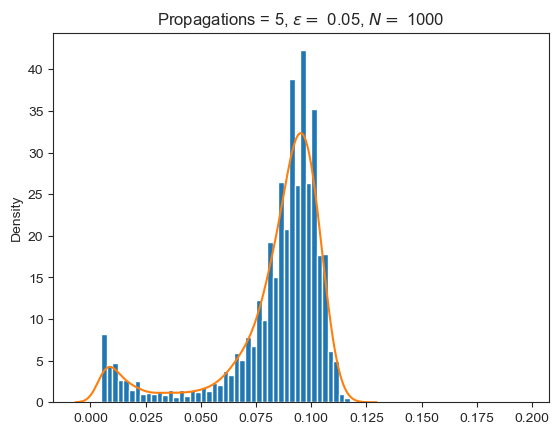

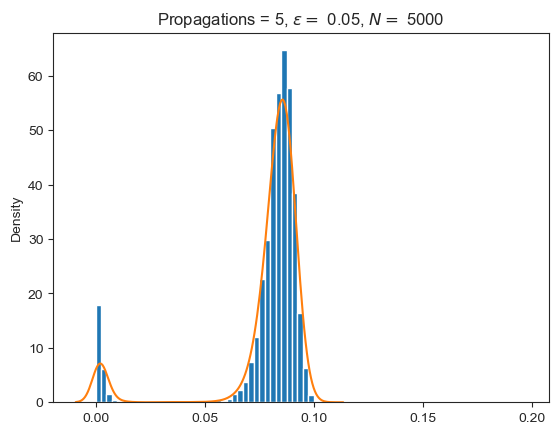

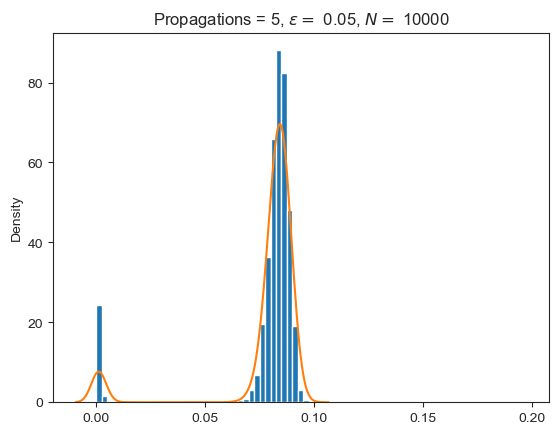

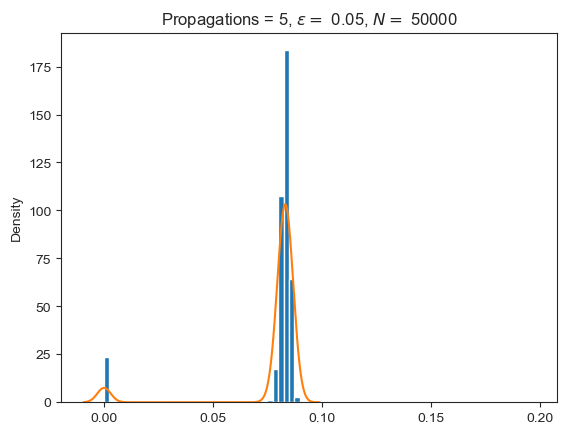

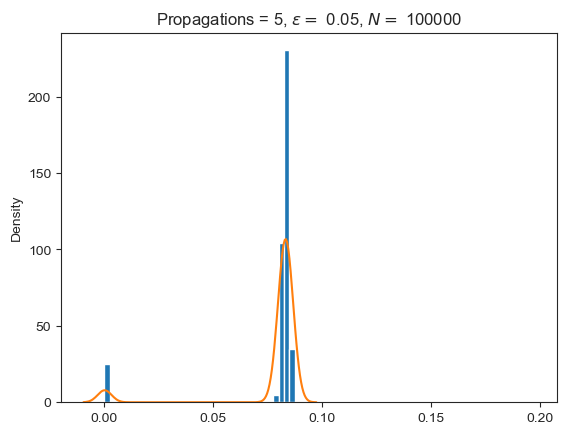

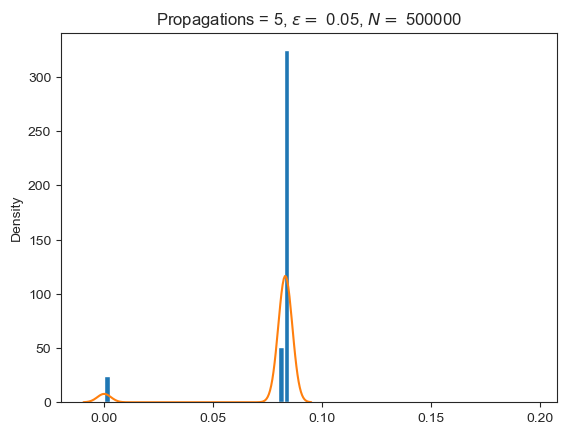

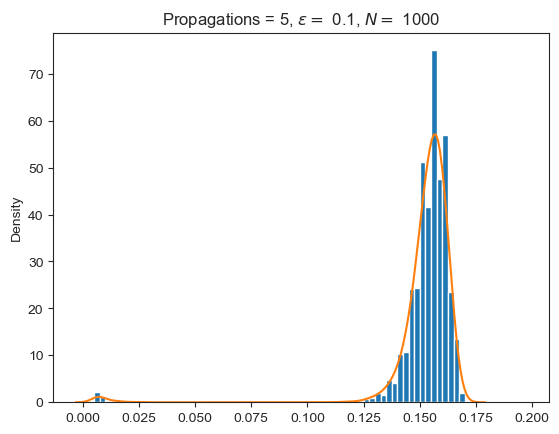

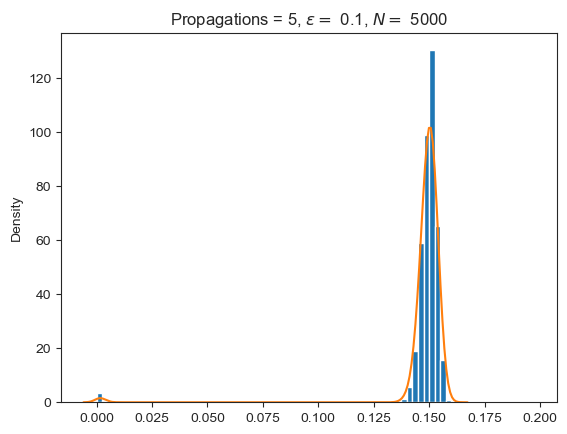

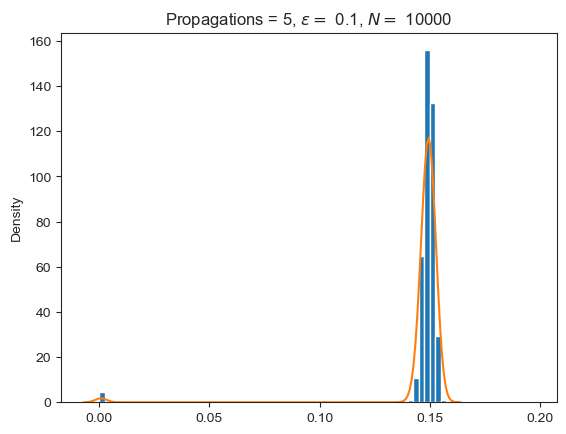

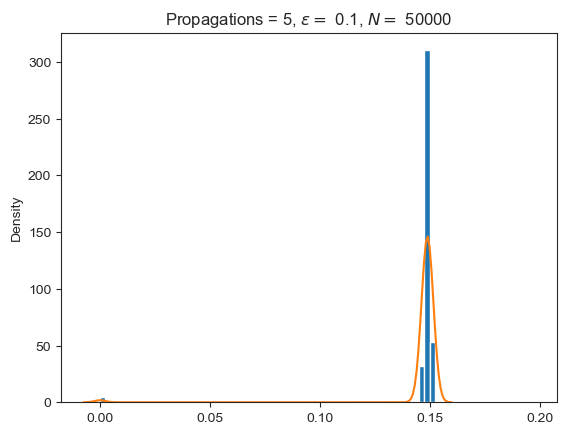

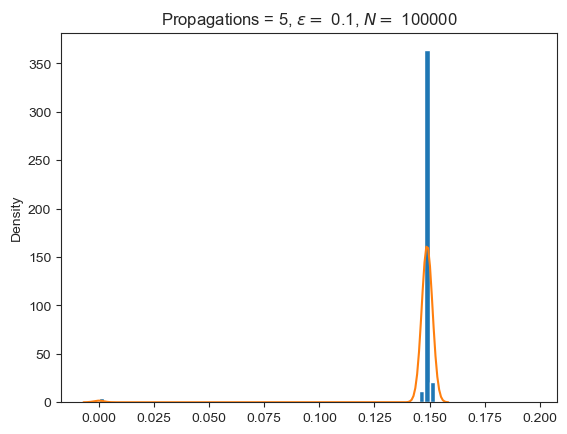

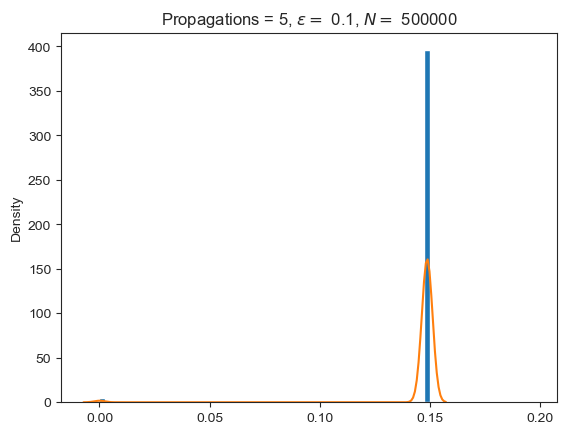

In [19]:
prob_total_max = [] # 3 elements, one for each propagation here for big outbreak
prob_total_min = [] # 3 elements, one for each propagation here for small outbreak
for i in range(len(props)): # for each number of propagations
    prob_props_tmp_max = []
    prob_props_tmp_min = []
    for j in range(len(eps_res)): # for each value of epsilon in this case
        file_name = 'measles/measles_'+str(eps_res[j])+suffix[i]+'GTP_fsize_inf_'+prefix[i]+'_'+str(eps_res[j])+'_500000.csv'
        df = np.loadtxt(file_name)
        max_list_res = []
        min_list_res = []
        for k in range(len(N_vec)): # for each value of the population
            a = plt.hist(df[k]/N_vec[k], bins = np.arange(0,0.2,0.0025), density = True)
            sns.kdeplot(df[k]/N_vec[k])
            n_half = np.argmin(abs(a[1]-(cases(3,0.2,eps_res[j],props[i]/N_vec[k])/2)))
            i_half = avg_2(a[1])
            inf_min = 0.0025*np.sum(a[0][:n_half]*i_half[:n_half])
            inf_max = 0.0025*np.sum(a[0][n_half:]*i_half[n_half:])
            max_list_res.append(inf_max)
            min_list_res.append(inf_min)
            plt.title(r'Propagations = '+str(props[i])+', $\epsilon =$ '+str(eps_res[j])+', $N =$ '+str(N_vec[k]))
            plt.show()
        prob_props_tmp_max.append(max_list_res)
        prob_props_tmp_min.append(min_list_res)
    prob_total_max.append(prob_props_tmp_max)  
    prob_total_min.append(prob_props_tmp_min)  

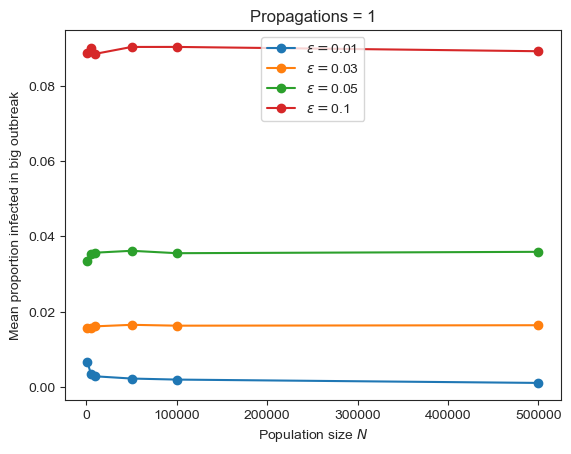

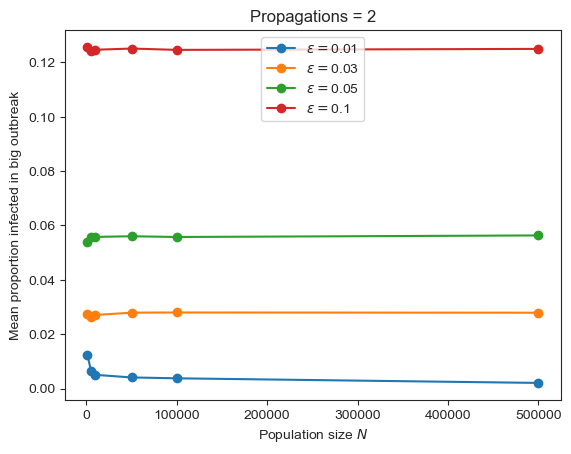

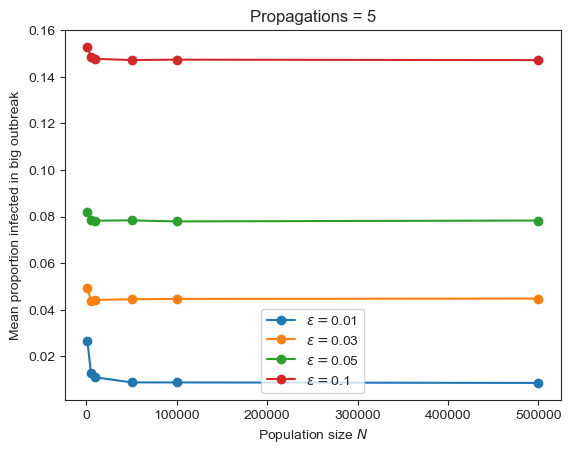

In [20]:
for i in range(len(props)):
    for j in range(len(eps_res)):
        plt.plot(N_vec, prob_total_max[i][j], '-o',label = r'$\epsilon = $'+str(eps_res[j]))
    plt.xlabel(r'Population size $N$')
    plt.ylabel('Mean proportion infected in big outbreak')
    plt.title('Propagations = '+str(props[i]))
    #plt.yscale('log')
    plt.legend()
    plt.show()

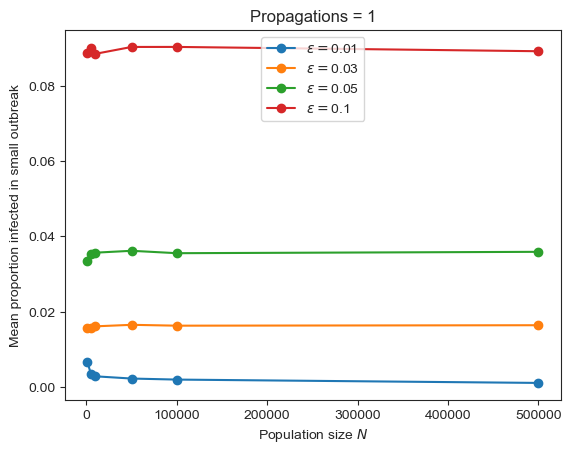

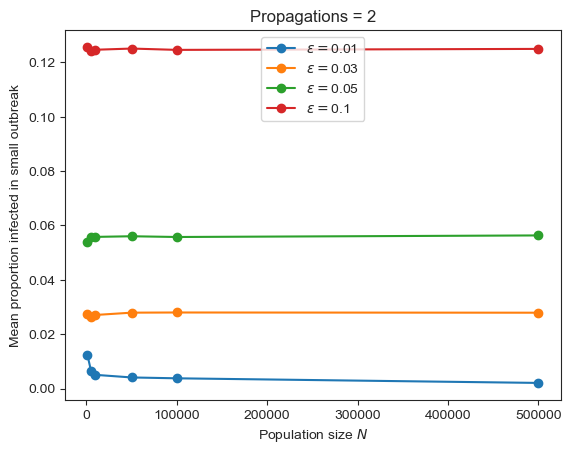

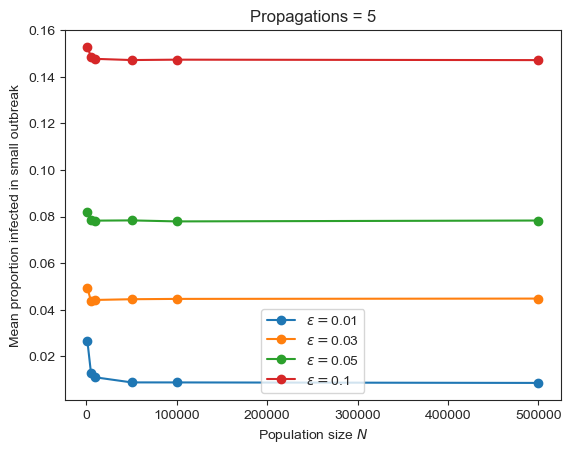

In [21]:
for i in range(len(props)):
    for j in range(len(eps_res)):
        plt.plot(N_vec, prob_total_max[i][j], '-o',label = r'$\epsilon = $'+str(eps_res[j]))
    plt.xlabel(r'Population size $N$')
    plt.ylabel('Mean proportion infected in small outbreak')
    plt.title('Propagations = '+str(props[i]))
    #plt.yscale('log')
    plt.legend()
    plt.show()

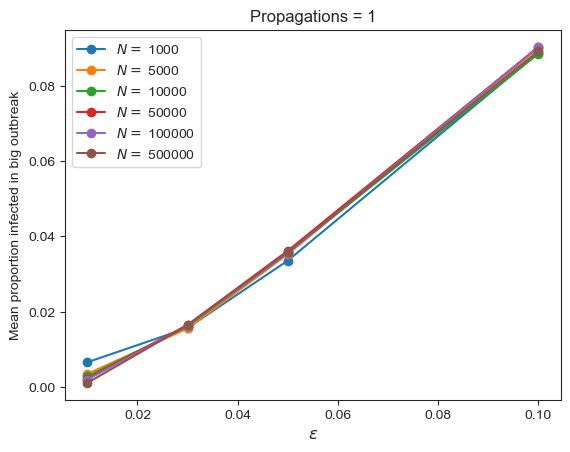

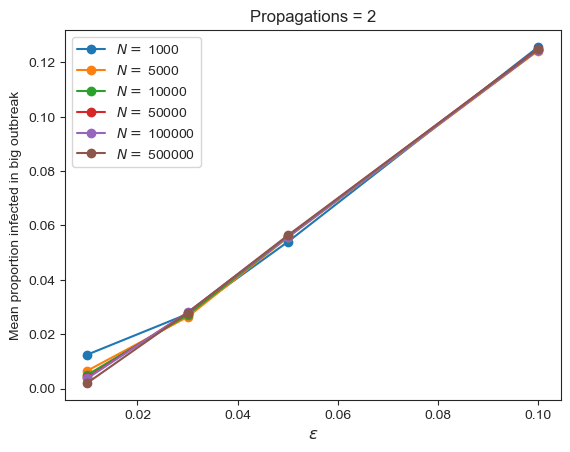

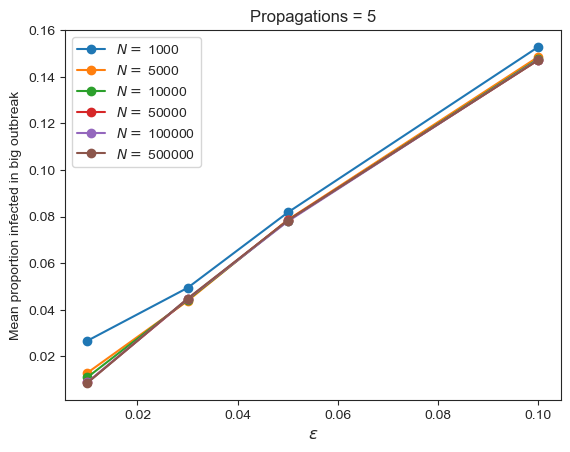

In [22]:
for i in range(len(props)):
    res_eps = np.array(prob_total_max[i]).transpose()
    for j in range(len(N_vec)):
        plt.plot(eps_res,res_eps[j,:], '-o', label = r'$N =$ '+str(N_vec[j]))
    plt.title('Propagations = '+str(props[i]))
    plt.xlabel(r'$\epsilon$', fontsize = 12)
    plt.ylabel('Mean proportion infected in big outbreak')
    plt.legend()
    plt.show()

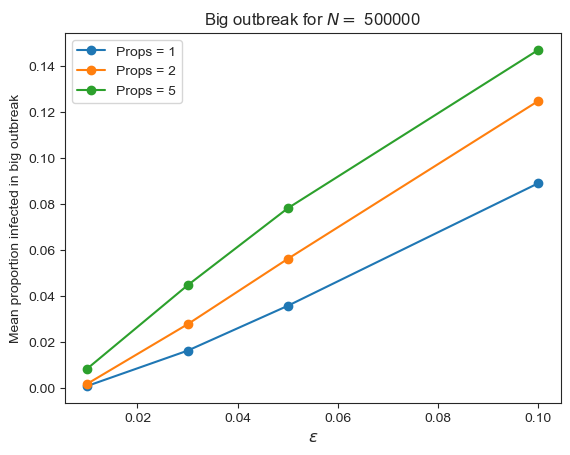

In [23]:
for i in range(len(props)):
    res_eps = np.array(prob_total_max[i]).transpose()
    plt.plot(eps_res,res_eps[-1,:], '-o', label = r'Props = '+str(props[i]))
plt.xlabel(r'$\epsilon$', fontsize = 12)
plt.ylabel('Mean proportion infected in big outbreak')
plt.title(r'Big outbreak for $N = $ '+str(N_vec[-1]))
plt.legend()
plt.show()

In [24]:
for i in range(len(props)):
    res_eps = np.array(prob_total_max[i]).transpose()
    plt.plot(eps_res,res_eps[0,:], '-o', label = r'Props = '+str(props[i]))
plt.xlabel(r'$\epsilon$', fontsize = 12)
plt.ylabel('Mean proportion infected in big outbreak')
plt.title(r'Big outbreak for $N = $ '+str(N_vec[0]))
plt.legend()
plt.show()

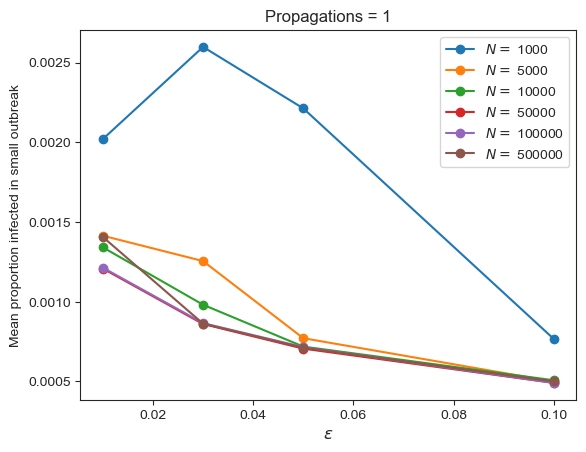

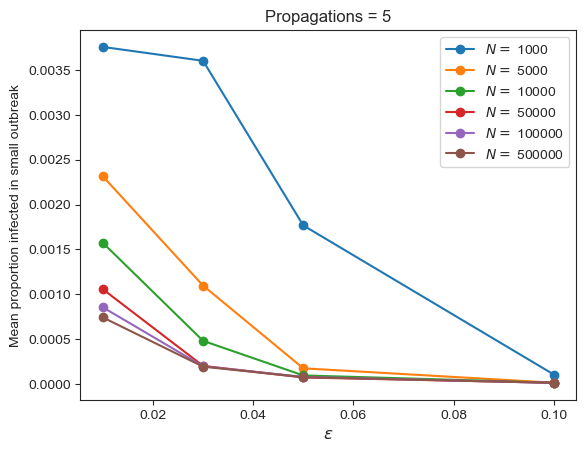

In [25]:
for i in range(len(props)):
    res_eps = np.array(prob_total_min[i]).transpose()
    for j in range(len(N_vec)):
        plt.plot(eps_res,res_eps[j,:], '-o', label = r'$N =$ '+str(N_vec[j]))
    plt.title('Propagations = '+str(props[i]))
    plt.xlabel(r'$\epsilon$', fontsize = 12)
    plt.ylabel('Mean proportion infected in small outbreak')
    plt.legend()
    plt.show()

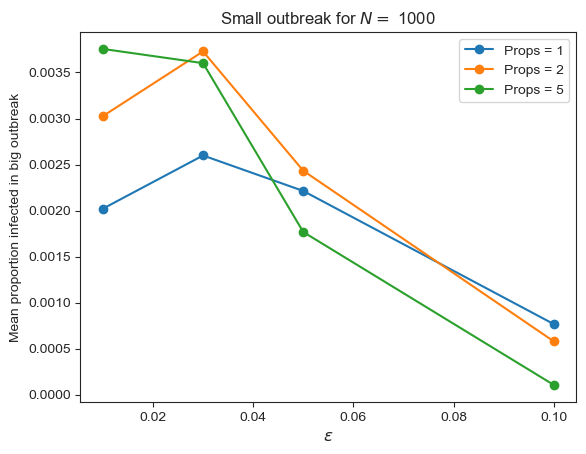

In [27]:
for i in range(len(props)):
    res_eps = np.array(prob_total_min[i]).transpose()
    plt.plot(eps_res,res_eps[0,:], '-o', label = r'Props = '+str(props[i]))
plt.xlabel(r'$\epsilon$', fontsize = 12)
plt.ylabel('Mean proportion infected in big outbreak')
plt.title(r'Small outbreak for $N = $ '+str(N_vec[0]))
plt.legend()
plt.show()

In [28]:
for i in range(len(props)):
    res_eps = np.array(prob_total_min[i]).transpose()
    plt.plot(eps_res,res_eps[-1,:], '-o', label = r'Props = '+str(props[i]))
plt.xlabel(r'$\epsilon$', fontsize = 12)
plt.ylabel('Mean proportion infected in big outbreak')
plt.title(r'Small outbreak for $N = $ '+str(N_vec[-1]))
plt.legend()
plt.show()

## Comparing histograms for different values of N, $\epsilon$ and propagations

### For biggest population

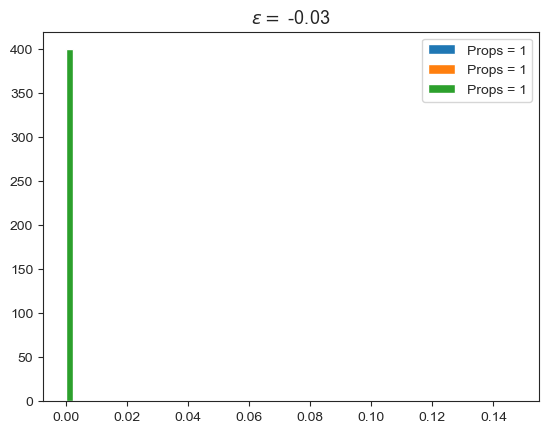

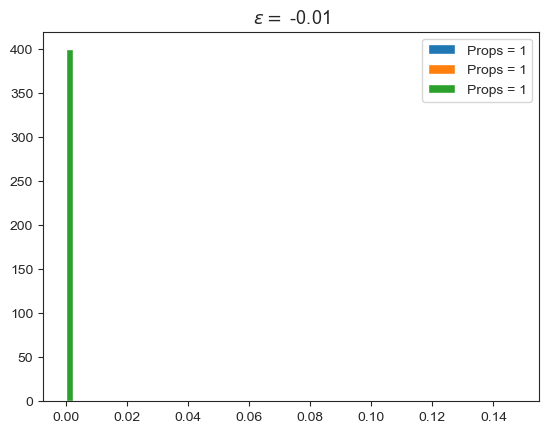

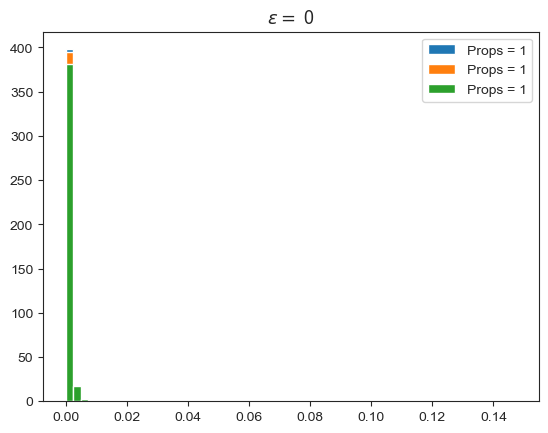

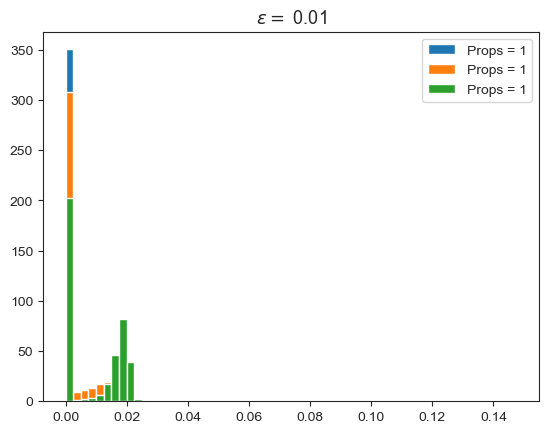

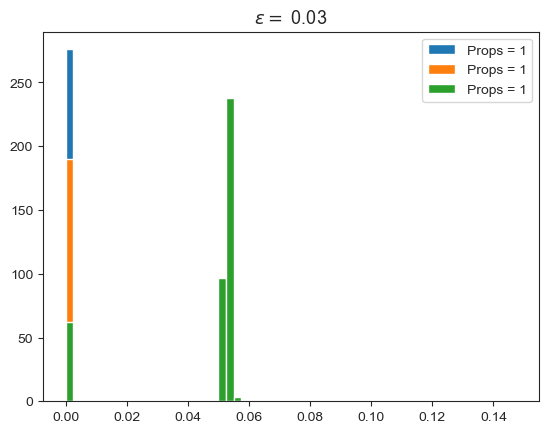

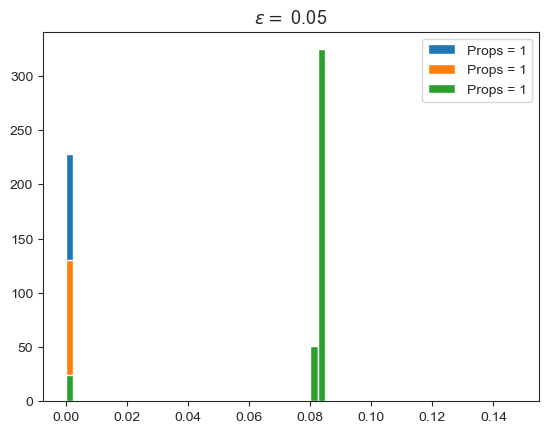

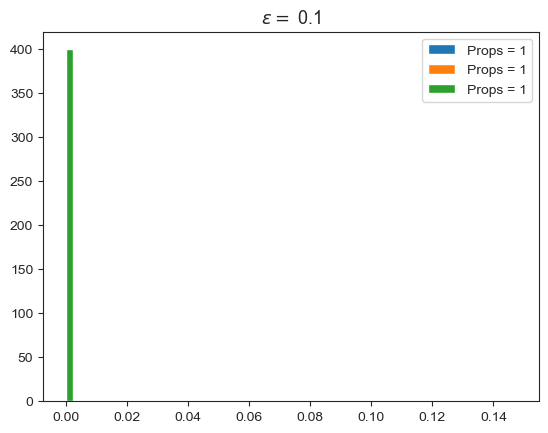

In [120]:
for i in range(len(eps_vec)):
    file_name_1 = files_1prop[i]
    file_name_2 = files_2prop[i]
    file_name_5 = files_5prop[i]
    df_1 = np.loadtxt(file_name_1)
    df_2 = np.loadtxt(file_name_2)
    df_5 = np.loadtxt(file_name_5) 
    df_1 = df_1[-1,:]
    df_2 = df_2[-1,:]
    df_5 = df_5[-1,:]
    plt.title(r'$\epsilon = $ '+str(eps_vec[i]), fontsize = 13)
    plt.hist(df_1/N_vec[-1], bins = np.arange(0,0.15,0.0025), density = True, label = 'Props = '+str(1))
    plt.hist(df_2/N_vec[-1], bins = np.arange(0,0.15,0.0025), density = True, label = 'Props = '+str(1))
    plt.hist(df_5/N_vec[-1], bins = np.arange(0,0.15,0.0025), density = True, label = 'Props = '+str(1))
    plt.legend()
    plt.show()

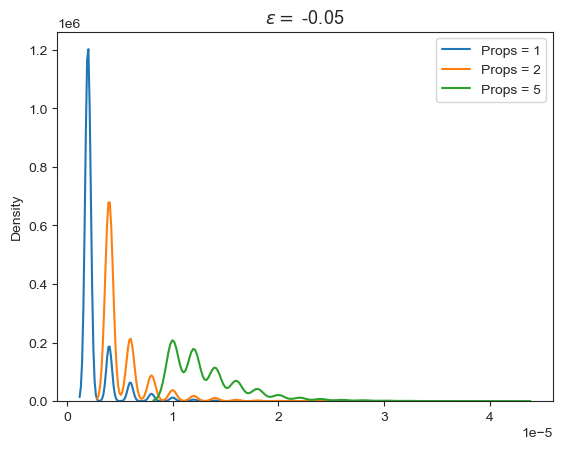

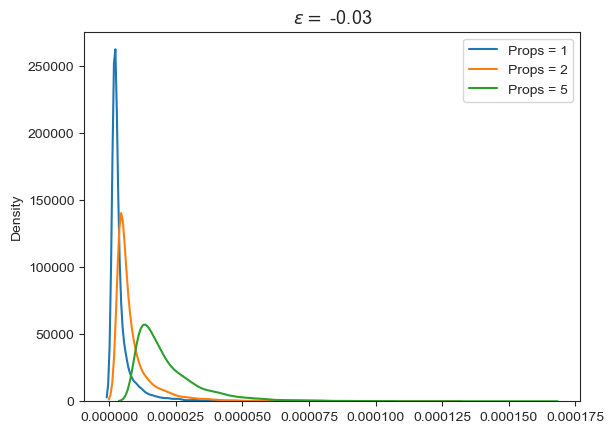

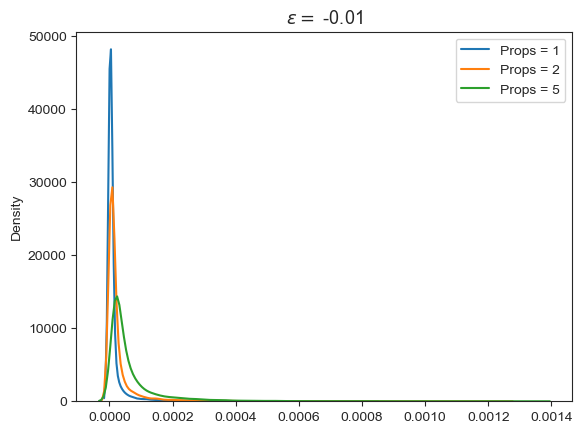

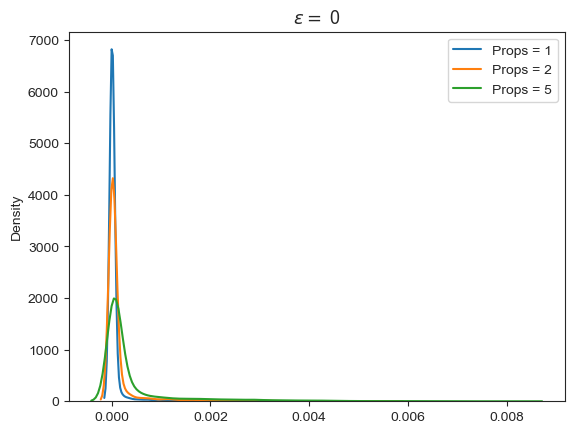

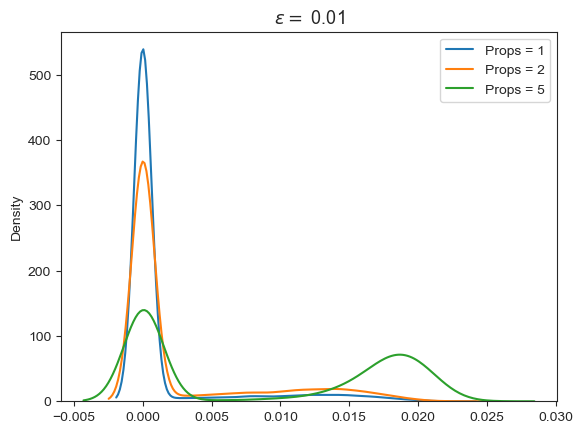

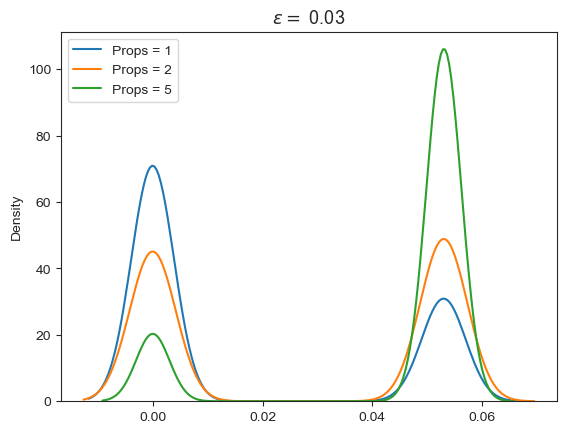

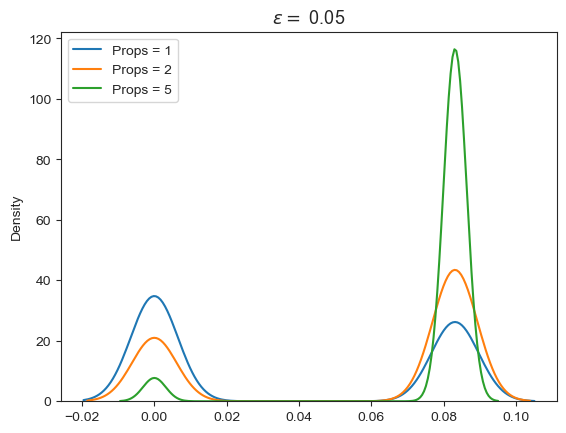

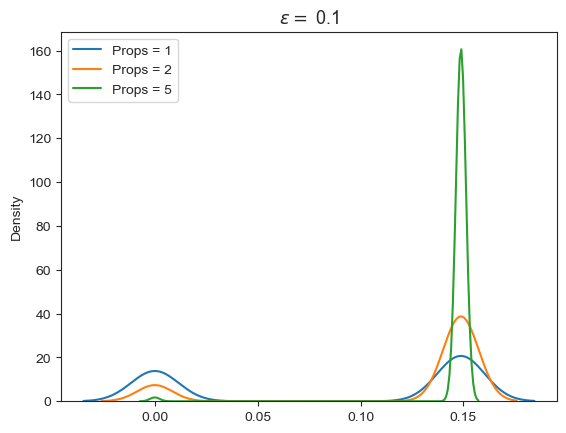

In [29]:
for i in range(len(eps_vec)):
    file_name_1 = files_1prop[i]
    file_name_2 = files_2prop[i]
    file_name_5 = files_5prop[i]
    df_1 = np.loadtxt(file_name_1)
    df_2 = np.loadtxt(file_name_2)
    df_5 = np.loadtxt(file_name_5) 
    df_1 = df_1[-1,:]
    df_2 = df_2[-1,:]
    df_5 = df_5[-1,:]
    plt.title(r'$\epsilon = $ '+str(eps_vec[i]), fontsize = 13)
    sns.kdeplot(df_1/N_vec[-1], label = 'Props = '+str(1))
    sns.kdeplot(df_2/N_vec[-1], label = 'Props = '+str(2))
    sns.kdeplot(df_5/N_vec[-1], label = 'Props = '+str(5))
    plt.legend()
    plt.show()

### For smallest population

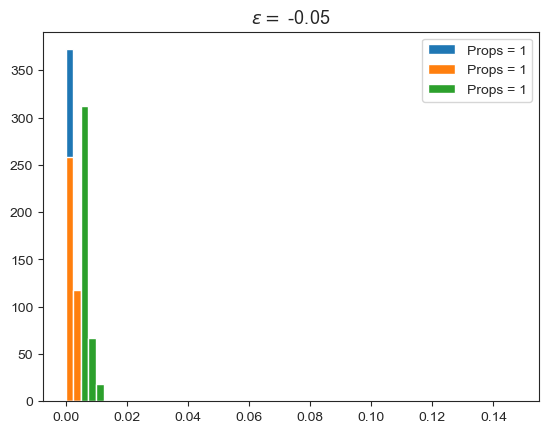

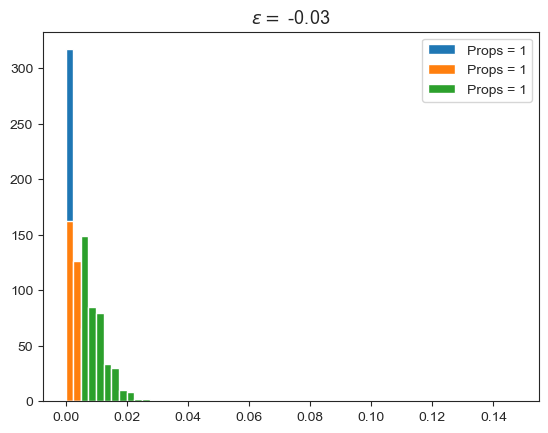

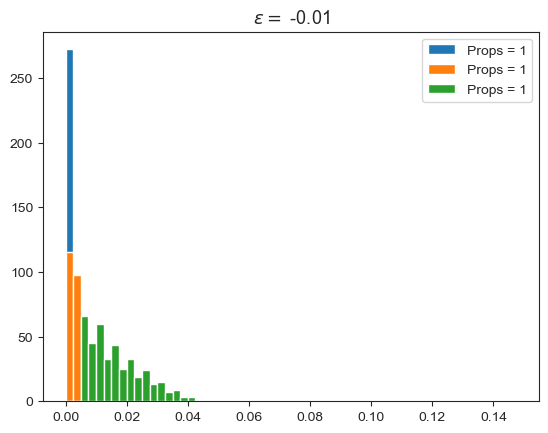

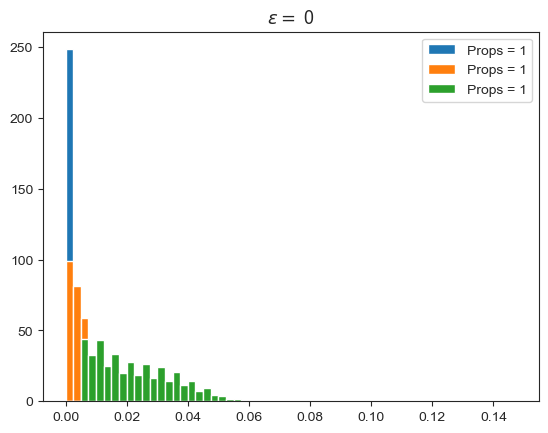

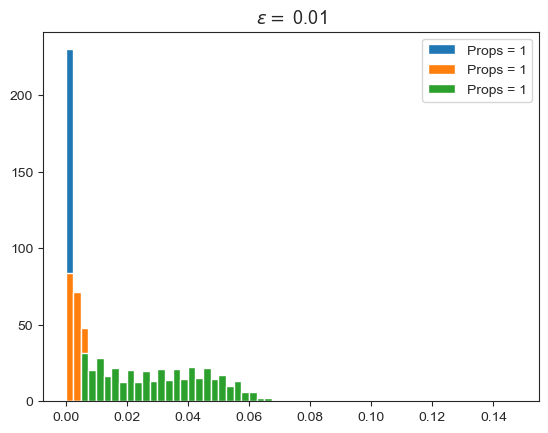

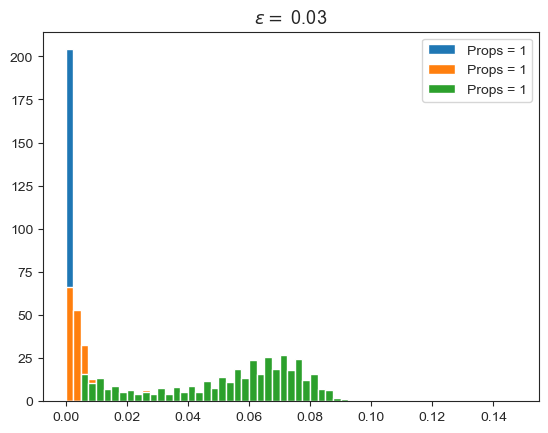

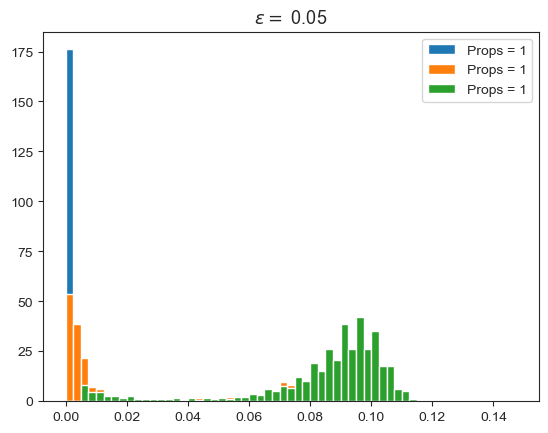

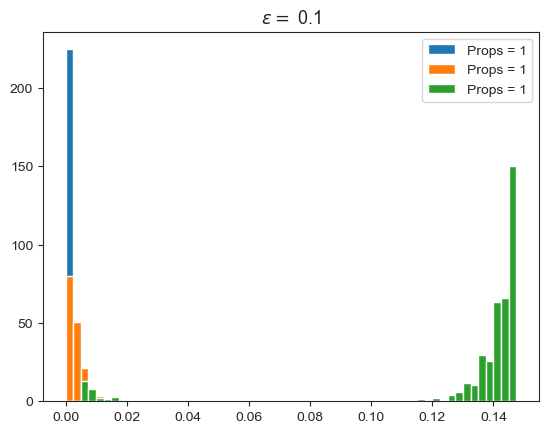

In [122]:
for i in range(len(eps_vec)):
    file_name_1 = files_1prop[i]
    file_name_2 = files_2prop[i]
    file_name_5 = files_5prop[i]
    df_1 = np.loadtxt(file_name_1)
    df_2 = np.loadtxt(file_name_2)
    df_5 = np.loadtxt(file_name_5) 
    df_1 = df_1[0,:]
    df_2 = df_2[0,:]
    df_5 = df_5[0,:]
    plt.title(r'$\epsilon = $ '+str(eps_vec[i]), fontsize = 13)
    plt.hist(df_1/N_vec[0], bins = np.arange(0,0.15,0.0025), density = True, label = 'Props = '+str(1))
    plt.hist(df_2/N_vec[0], bins = np.arange(0,0.15,0.0025), density = True, label = 'Props = '+str(1))
    plt.hist(df_5/N_vec[0], bins = np.arange(0,0.15,0.0025), density = True, label = 'Props = '+str(1))
    plt.legend()
    plt.show()

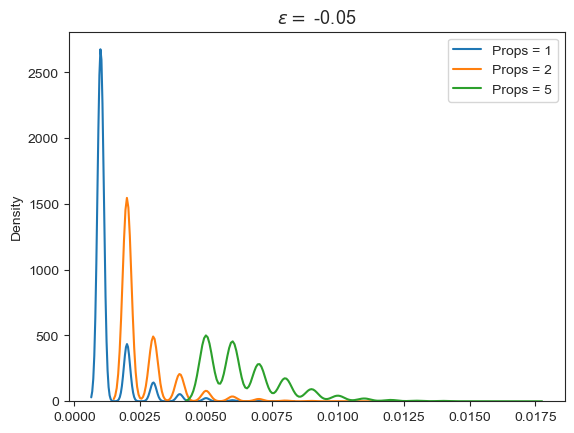

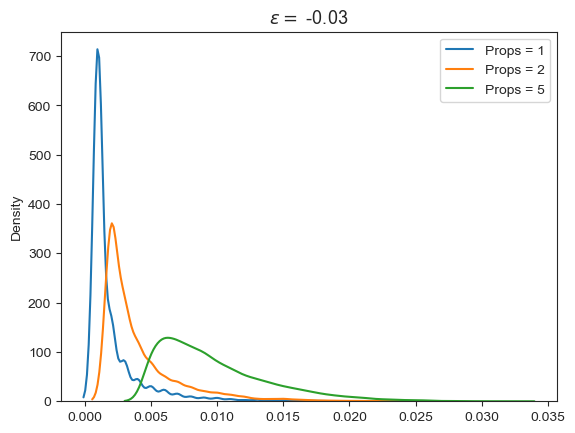

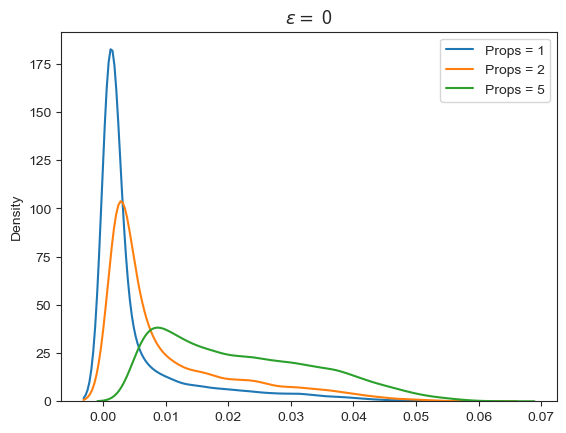

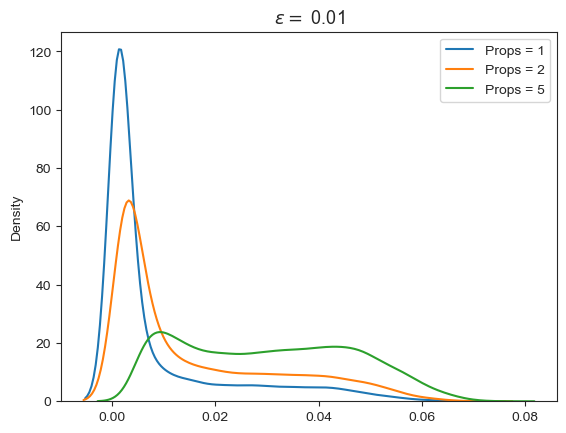

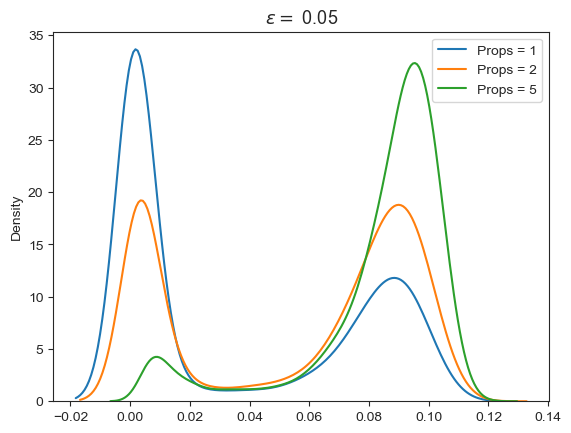

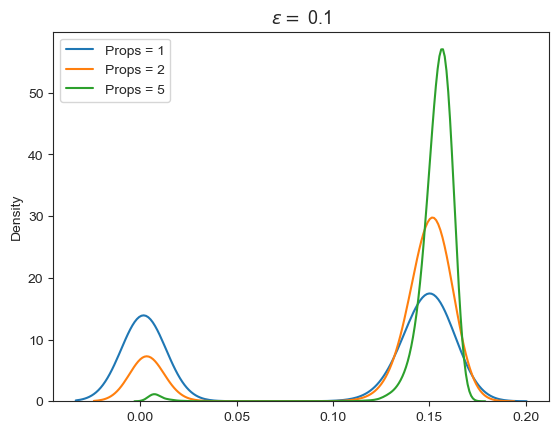

In [30]:
for i in range(len(eps_vec)):
    file_name_1 = files_1prop[i]
    file_name_2 = files_2prop[i]
    file_name_5 = files_5prop[i]
    df_1 = np.loadtxt(file_name_1)
    df_2 = np.loadtxt(file_name_2)
    df_5 = np.loadtxt(file_name_5) 
    df_1 = df_1[0,:]
    df_2 = df_2[0,:]
    df_5 = df_5[0,:]
    plt.title(r'$\epsilon = $ '+str(eps_vec[i]), fontsize = 13)
    sns.kdeplot(df_1/N_vec[0], label = 'Props = '+str(1))
    sns.kdeplot(df_2/N_vec[0], label = 'Props = '+str(2))
    sns.kdeplot(df_5/N_vec[0], label = 'Props = '+str(5))
    plt.legend()
    plt.show()